In [1]:
import multirex as mrex
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import pandas as pd
from tqdm import tqdm
import warnings
from sklearn.exceptions import DataConversionWarning

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
## general metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# accuracy, f1 , recall, precision
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
## hamming loss and exact match
from sklearn.metrics import hamming_loss, accuracy_score

%matplotlib inline

#load txt waves.txt
waves=np.loadtxt("waves.txt")
n_points = len(waves)
indices = np.linspace(0, len(waves) - 1, n_points, endpoint=True)
indices = np.round(indices).astype(int)  

puntos_seleccionados = waves[indices]
waves=puntos_seleccionados
wn_grid=np.sort((10000/waves))

In [2]:
def normalize_min_max_by_row(df):
    min_by_row = df.min(axis=1)
    max_by_row = df.max(axis=1)
    range_by_row = max_by_row - min_by_row
    normalized = (df.sub(min_by_row, axis=0)).div(range_by_row, axis=0)
    normalized[range_by_row == 0] = 0
    return normalized

import ast
def string_to_list(string):
    return ast.literal_eval(string)

def plot_confusion_matrix(y_test, y_pred, labels, display_labels, title):
    cm = confusion_matrix(y_test, y_pred, labels=labels, normalize='true')
    fig, ax = plt.subplots(figsize=(8, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(values_format=".0%", colorbar=True, ax=ax)
    disp.im_.colorbar.remove()  
    disp.im_.set_clim(0, 1)

    cbar = fig.colorbar(disp.im_, ax=ax)
    cbar.ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.title(title, fontsize=20)

    plt.show()
    
def remove_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    warnings.filterwarnings(action='ignore', category=DataConversionWarning)

## load data

In [3]:
CO2_data = pd.read_csv("spec_data/CO2_data.csv")
CO2_data.data=CO2_data.iloc[:,-n_points:]
CO2_data.params=CO2_data.iloc[:,:-n_points]

CH4_data = pd.read_csv("spec_data/CH4_data.csv")
CH4_data.data=CH4_data.iloc[:,-n_points:]
CH4_data.params=CH4_data.iloc[:,:-n_points]

O3_data = pd.read_csv("spec_data/O3_data.csv")
O3_data.data=O3_data.iloc[:,-n_points:]
O3_data.params=O3_data.iloc[:,:-n_points]

H2O_data = pd.read_csv("spec_data/H2O_data.csv")
H2O_data.data=H2O_data.iloc[:,-n_points:]
H2O_data.params=H2O_data.iloc[:,:-n_points]

CH4_O3_data = pd.read_csv("spec_data/CH4_O3_data.csv")
CH4_O3_data.data=CH4_O3_data.iloc[:,-n_points:]
CH4_O3_data.params=CH4_O3_data.iloc[:,:-n_points]

CH4_H2O_data = pd.read_csv("spec_data/CH4_H2O_data.csv")
CH4_H2O_data.data=CH4_H2O_data.iloc[:,-n_points:]
CH4_H2O_data.params=CH4_H2O_data.iloc[:,:-n_points]

O3_H2O_data = pd.read_csv("spec_data/O3_H2O_data.csv")
O3_H2O_data.data=O3_H2O_data.iloc[:,-n_points:]
O3_H2O_data.params=O3_H2O_data.iloc[:,:-n_points]

CH4_O3_H2O_data = pd.read_csv("spec_data/CH4_O3_H2O_data.csv")
CH4_O3_H2O_data.data=CH4_O3_H2O_data.iloc[:,-n_points:]
CH4_O3_H2O_data.params=CH4_O3_H2O_data.iloc[:,:-n_points]

C:\Users\santi\AppData\Local\Temp\ipykernel_16956\3288248873.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CO2_data.data=CO2_data.iloc[:,-n_points:]
C:\Users\santi\AppData\Local\Temp\ipykernel_16956\3288248873.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CO2_data.params=CO2_data.iloc[:,:-n_points]
C:\Users\santi\AppData\Local\Temp\ipykernel_16956\3288248873.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CH4_data.data=CH4_data.iloc[:,-n_points:]
C:\Users\santi\AppData\Local\Temp\ipykernel_16956\3288248873.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.

## Train data

### SNR = 1

In [4]:
SNR1_CO2_data = mrex.generate_df_SNR_noise(
    df=CO2_data,
    n_repeat=20_000,
    SNR=1     
)

SNR1_CH4_data = mrex.generate_df_SNR_noise(
    df=CH4_data,
    n_repeat=500,
    SNR=1     
)

SNR1_O3_data = mrex.generate_df_SNR_noise(
    df=O3_data,
    n_repeat=300,
    SNR=1     
)

SNR1_H2O_data = mrex.generate_df_SNR_noise(
    df=H2O_data,
    n_repeat=1000,
    SNR=1     
)

SNR1_CH4_O3_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_data,
    n_repeat=20,
    SNR=1
)

SNR1_CH4_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_H2O_data,
    n_repeat=20,
    SNR=1
)

SNR1_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=O3_H2O_data,
    n_repeat=20,
    SNR=1
)

SNR1_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_H2O_data,
    n_repeat=5,
    SNR=1
)

    
SNR1_df = pd.concat(
    [
        SNR1_CO2_data,
        SNR1_CH4_data,
        SNR1_O3_data,
        SNR1_H2O_data,
        SNR1_CH4_O3_data,
        SNR1_CH4_H2O_data,
        SNR1_O3_H2O_data,
        SNR1_CH4_O3_H2O_data
    ],
    ignore_index=True
) 

### SNR = 3

In [5]:
SNR3_CO2_data = mrex.generate_df_SNR_noise(
    df=CO2_data,
    n_repeat=20_000,
    SNR=3     
)

SNR3_CH4_data = mrex.generate_df_SNR_noise(
    df=CH4_data,
    n_repeat=500,
    SNR=3     
)

SNR3_O3_data = mrex.generate_df_SNR_noise(
    df=O3_data,
    n_repeat=300,
    SNR=3     
)

SNR3_H2O_data = mrex.generate_df_SNR_noise(
    df=H2O_data,
    n_repeat=1000,
    SNR=3     
)

SNR3_CH4_O3_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_data,
    n_repeat=20,
    SNR=3
)

SNR3_CH4_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_H2O_data,
    n_repeat=20,
    SNR=3
)

SNR3_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=O3_H2O_data,
    n_repeat=20,
    SNR=3
)

SNR3_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_H2O_data,
    n_repeat=5,
    SNR=3
)
    

SNR3_df = pd.concat(
    [
        SNR3_CO2_data,
        SNR3_CH4_data,
        SNR3_O3_data,
        SNR3_H2O_data,
        SNR3_CH4_O3_data,
        SNR3_CH4_H2O_data,
        SNR3_O3_H2O_data,
        SNR3_CH4_O3_H2O_data
    ],
    ignore_index=True
) 

### SNR = 6

In [8]:
SNR6_CO2_data = mrex.generate_df_SNR_noise(
    df=CO2_data,
    n_repeat=20_000,
    SNR=6     
)

SNR6_CH4_data = mrex.generate_df_SNR_noise(
    df=CH4_data,
    n_repeat=500,
    SNR=6     
)

SNR6_O3_data = mrex.generate_df_SNR_noise(
    df=O3_data,
    n_repeat=300,
    SNR=6     
)

SNR6_H2O_data = mrex.generate_df_SNR_noise(
    df=H2O_data,
    n_repeat=1000,
    SNR=6     
)

SNR6_CH4_O3_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_data,
    n_repeat=20,
    SNR=6
)

SNR6_CH4_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_H2O_data,
    n_repeat=20,
    SNR=6
)

SNR6_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=O3_H2O_data,
    n_repeat=20,
    SNR=6
)

SNR6_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_H2O_data,
    n_repeat=5,
    SNR=6
)
    

SNR6_df = pd.concat(
    [
        SNR6_CO2_data,
        SNR6_CH4_data,
        SNR6_O3_data,
        SNR6_H2O_data,
        SNR6_CH4_O3_data,
        SNR6_CH4_H2O_data,
        SNR6_O3_H2O_data,
        SNR6_CH4_O3_H2O_data
    ],
    ignore_index=True
)

### SNR = 10

In [9]:
SNR10_CO2_data = mrex.generate_df_SNR_noise(
    df=CO2_data,
    n_repeat=10_000,
    SNR=10     
)

SNR10_CH4_data = mrex.generate_df_SNR_noise(
    df=CH4_data,
    n_repeat=500,
    SNR=10    
)

SNR10_O3_data = mrex.generate_df_SNR_noise(
    df=O3_data,
    n_repeat=300,
    SNR=10    
)

SNR10_H2O_data = mrex.generate_df_SNR_noise(
    df=H2O_data,
    n_repeat=500,
    SNR=10    
)

SNR10_CH4_O3_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_data,
    n_repeat=20,
    SNR=10
)

SNR10_CH4_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_H2O_data,
    n_repeat=20,
    SNR=10
)

SNR10_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=O3_H2O_data,
    n_repeat=20,
    SNR=10
)

SNR10_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_H2O_data,
    n_repeat=5,
    SNR=10
)
    

SNR10_df = pd.concat(
    [
        SNR10_CO2_data,
        SNR10_CH4_data,
        SNR10_O3_data,
        SNR10_H2O_data,
        SNR10_CH4_O3_data,
        SNR10_CH4_H2O_data,
        SNR10_O3_H2O_data,
        SNR10_CH4_O3_H2O_data
    ],
    ignore_index=True
) 

### SNR = 20

In [10]:
SNR20_CO2_data = mrex.generate_df_SNR_noise(
    df=CO2_data,
    n_repeat=10_000,
    SNR=20     
)

SNR20_CH4_data = mrex.generate_df_SNR_noise(
    df=CH4_data,
    n_repeat=500,
    SNR=20     
)

SNR20_O3_data = mrex.generate_df_SNR_noise(
    df=O3_data,
    n_repeat=300,
    SNR=20     
)

SNR20_H2O_data = mrex.generate_df_SNR_noise(
    df=H2O_data,
    n_repeat=500,
    SNR=20     
)

SNR20_CH4_O3_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_data,
    n_repeat=20,
    SNR=20
)

SNR20_CH4_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_H2O_data,
    n_repeat=20,
    SNR=20
)

SNR20_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=O3_H2O_data,
    n_repeat=20,
    SNR=20
)

SNR20_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_H2O_data,
    n_repeat=5,
    SNR=20
)   

SNR20_df = pd.concat(
    [
        SNR20_CO2_data,
        SNR20_CH4_data,
        SNR20_O3_data,
        SNR20_H2O_data,
        SNR20_CH4_O3_data,
        SNR20_CH4_H2O_data,
        SNR20_O3_H2O_data,
        SNR20_CH4_O3_H2O_data
    ],
    ignore_index=True
) 

### SNR = NaN

In [11]:
SNRnan_CO2_data = mrex.generate_df_SNR_noise(
    df=CO2_data,
    n_repeat=10000,
    SNR=10_000     
)

SNRnan_CH4_data = mrex.generate_df_SNR_noise(
    df=CH4_data,
    n_repeat=500,
    SNR=10_000     
)

SNRnan_O3_data = mrex.generate_df_SNR_noise(
    df=O3_data,
    n_repeat=500,
    SNR=10_000     
)

SNRnan_H2O_data = mrex.generate_df_SNR_noise(
    df=H2O_data,
    n_repeat=500,
    SNR=10_000     
)

SNRnan_CH4_O3_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_data,
    n_repeat=50,
    SNR=10_000
)

SNRnan_CH4_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_H2O_data,
    n_repeat=50,
    SNR=10_000
)

SNRnan_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=O3_H2O_data,
    n_repeat=50,
    SNR=10_000
)

SNRnan_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_H2O_data,
    n_repeat=5,
    SNR=10_000
)    

SNRnan_df = pd.concat(
    [
        SNRnan_CO2_data,
        SNRnan_CH4_data,
        SNRnan_O3_data,
        SNRnan_H2O_data,
        SNRnan_CH4_O3_data,
        SNRnan_CH4_H2O_data,
        SNRnan_O3_H2O_data,
        SNRnan_CH4_O3_H2O_data
    ],
    ignore_index=True
) 

In [12]:
SNRall= pd.concat([SNR1_df,SNR3_df,SNR6_df,SNR10_df,SNR20_df,SNRnan_df],
                  ignore_index=True)

SNRall["label"] = SNRall["label"].apply(string_to_list)
SNRall_train, SNRall_test = train_test_split(SNRall, test_size=0.2,)
SNRall_train.iloc[:,-n_points:]=normalize_min_max_by_row(SNRall_train.iloc[:,-n_points:])

SNRall_X_train = SNRall_train.iloc[:,-n_points:]
SNRall_Y_train = np.array(SNRall_train["label"].tolist())


## RF

In [ ]:
rf= RandomForestClassifier(n_estimators=100,
                           max_depth= 200,
                           criterion= "entropy",
                           min_samples_leaf= 3,
                           n_jobs=-1,
                           )

import joblib
joblib.dump(rf, 'MC_rf.joblib')

rf.fit(SNRall_X_train,SNRall_Y_train)

In [13]:
import joblib
rf = joblib.load('MC_rf.joblib')

## Test

In [14]:
SNR = 1

SNR_test_CO2_data = mrex.generate_df_SNR_noise(
    df=CO2_data,
    n_repeat=10_000,
    SNR= SNR    
)

SNR_test_CH4_data = mrex.generate_df_SNR_noise(
    df=CH4_data,
    n_repeat=500,
    SNR= SNR    
)

SNR_test_O3_data = mrex.generate_df_SNR_noise(
    df=O3_data,
    n_repeat=500,
    SNR= SNR    
)

SNR_test_H2O_data = mrex.generate_df_SNR_noise(
    df=H2O_data,
    n_repeat=500,
    SNR= SNR    
)

SNR_test_CH4_O3_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_data,
    n_repeat=50,
    SNR=SNR
)

SNR_test_CH4_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_H2O_data,
    n_repeat=50,
    SNR=SNR
)

SNR_test_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=O3_H2O_data,
    n_repeat=50,
    SNR=SNR
)

SNR_test_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_H2O_data,
    n_repeat=10,
    SNR=SNR
)
    

SNR_test_df = pd.concat(
    [
        SNR_test_CO2_data,
        SNR_test_CH4_data,
        SNR_test_O3_data,
        SNR_test_H2O_data,
        SNR_test_CH4_O3_data,
        SNR_test_CH4_H2O_data,
        SNR_test_O3_H2O_data,
        SNR_test_CH4_O3_H2O_data
    ],
    ignore_index=True
) 
SNR_test_df["label"] = SNR_test_df["label"].apply(string_to_list)

SNR_test_df.iloc[:,-n_points:]=normalize_min_max_by_row(SNR_test_df.iloc[:,-n_points:])
SNR_X_test = SNR_test_df.iloc[:,-n_points:]
SNR_test_CH4 = np.array([item[0] for item in SNR_test_df["label"]]) 
SNR_test_O3 = np.array([item[1] for item in SNR_test_df["label"]])
SNR_test_H2O = np.array([item[2] for item in SNR_test_df["label"]])

SNR_test_df["CH4 label"] = SNR_test_CH4
SNR_test_df["O3 label"] = SNR_test_O3
SNR_test_df["H2O label"] = SNR_test_H2O

GLOBAL SCORES
Hamming Loss
0.37548888888888887
Exact Match
0.25821333333333335
Precision
0.6315848204000067
Recall
0.5860666666666666
F1
0.606627919279847
CH4 SCORES
[[50159 24841]
 [28071 46929]]
              precision    recall  f1-score   support

           0       0.64      0.67      0.65     75000
           1       0.65      0.63      0.64     75000

    accuracy                           0.65    150000
   macro avg       0.65      0.65      0.65    150000
weighted avg       0.65      0.65      0.65    150000


 ----------
O3 SCORES
[[49193 25807]
 [25093 49907]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66     75000
           1       0.66      0.67      0.66     75000

    accuracy                           0.66    150000
   macro avg       0.66      0.66      0.66    150000
weighted avg       0.66      0.66      0.66    150000


 ----------
H2O SCORES
[[49813 25187]
 [39971 35029]]
              precision    recall  f1-sc

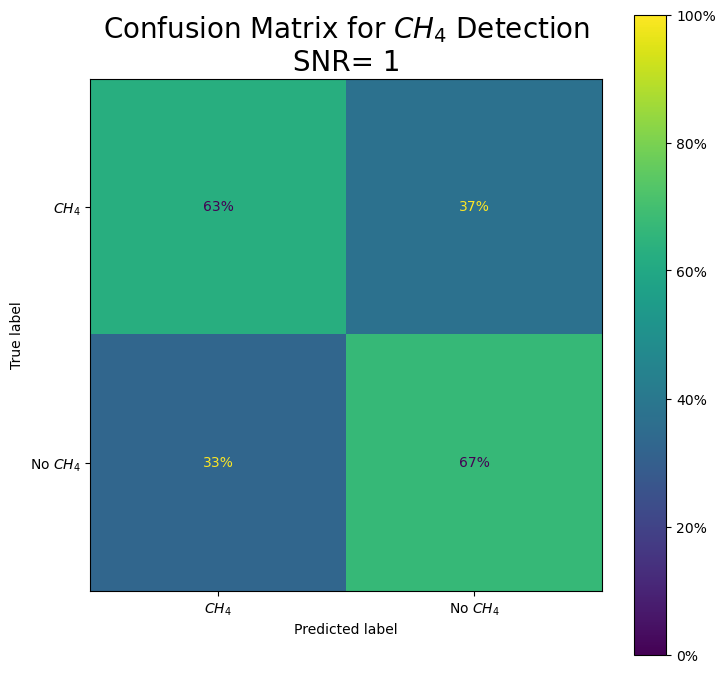

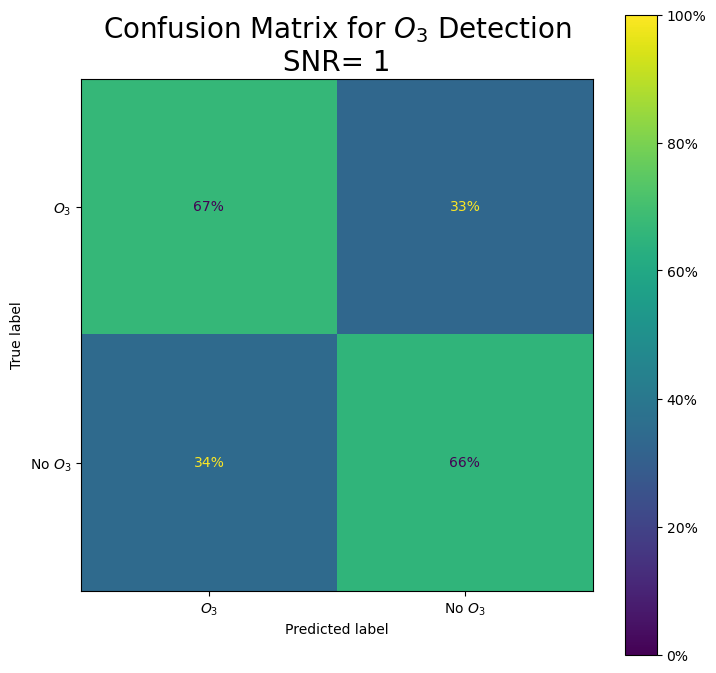

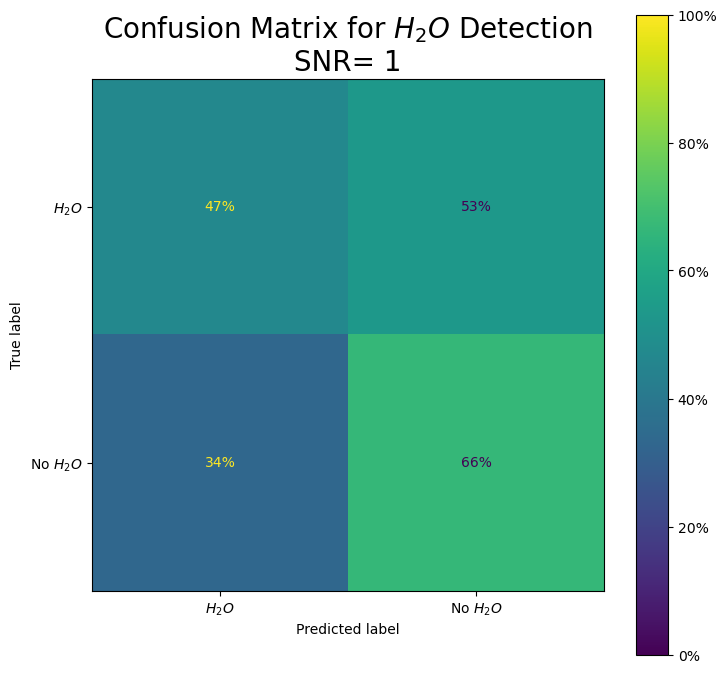

In [15]:
remove_warnings()

CH4_probabilities= rf.predict_proba(SNR_X_test)[0][:,1]
O3_probabilities= rf.predict_proba(SNR_X_test)[1][:,1]
H2O_probabilities= rf.predict_proba(SNR_X_test)[2][:,1]
CH4_threshold = 0.49
O3_threshold = 0.46
H2O_threshold = 0.5


CH4_y_pred = (CH4_probabilities > CH4_threshold).astype(int)
O3_y_pred = (O3_probabilities > O3_threshold).astype(int)
H2O_y_pred = (H2O_probabilities > H2O_threshold).astype(int)

SNR_test_df["CH4 pred"] = CH4_y_pred
SNR_test_df["CH4 score"] = CH4_probabilities
SNR_test_df["O3 pred"] = O3_y_pred
SNR_test_df["O3 score"] = O3_probabilities
SNR_test_df["H2O pred"] = H2O_y_pred
SNR_test_df["H2O score"] = H2O_probabilities

print("GLOBAL SCORES")
print("Hamming Loss")
print(hamming_loss(SNR_test_df[["CH4 label", "O3 label", "H2O label"]],
                   SNR_test_df[["CH4 pred", "O3 pred", "H2O pred"]]))
print("Exact Match")
print(accuracy_score(SNR_test_df[["CH4 label", "O3 label", "H2O label"]], 
                     SNR_test_df[["CH4 pred", "O3 pred", "H2O pred"]]))

print("Precision")
print(precision_score(SNR_test_df[["CH4 label", "O3 label", "H2O label"]], 
                      SNR_test_df[["CH4 pred", "O3 pred", "H2O pred"]], 
                      average="macro"))
print("Recall")
print(recall_score(SNR_test_df[["CH4 label", "O3 label", "H2O label"]],
                   SNR_test_df[["CH4 pred", "O3 pred", "H2O pred"]], 
                   average="macro"))
print("F1")
print(f1_score(SNR_test_df[["CH4 label", "O3 label", "H2O label"]],
               SNR_test_df[["CH4 pred", "O3 pred", "H2O pred"]],
               average="macro"))

print("CH4 SCORES")
print(confusion_matrix(SNR_test_CH4, CH4_y_pred))
print(classification_report(SNR_test_CH4, CH4_y_pred))
print("\n",10*"-")
print("O3 SCORES")
print(confusion_matrix(SNR_test_O3, O3_y_pred))
print(classification_report(SNR_test_O3, O3_y_pred))
print("\n",10*"-")
print("H2O SCORES")
print(confusion_matrix(SNR_test_H2O, H2O_y_pred))
print(classification_report(SNR_test_H2O, H2O_y_pred))


plot_confusion_matrix(
    SNR_test_CH4, CH4_y_pred,
    labels=[1,0], display_labels=["$CH_4$", "No $CH_4$"],
    title=f"Confusion Matrix for $CH_4$ Detection\n SNR= {SNR} "
)

plot_confusion_matrix(
    SNR_test_O3, O3_y_pred,
    labels=[1,0], display_labels=["$O_3$", "No $O_3$"],
    title=f"Confusion Matrix for $O_3$ Detection\n SNR= {SNR} "
)

plot_confusion_matrix(
    SNR_test_H2O, H2O_y_pred,
    labels=[1,0], display_labels=["$H_2O$", "No $H_2O$"],
    title=f"Confusion Matrix for $H_2O$ Detection\n SNR= {SNR} "
)


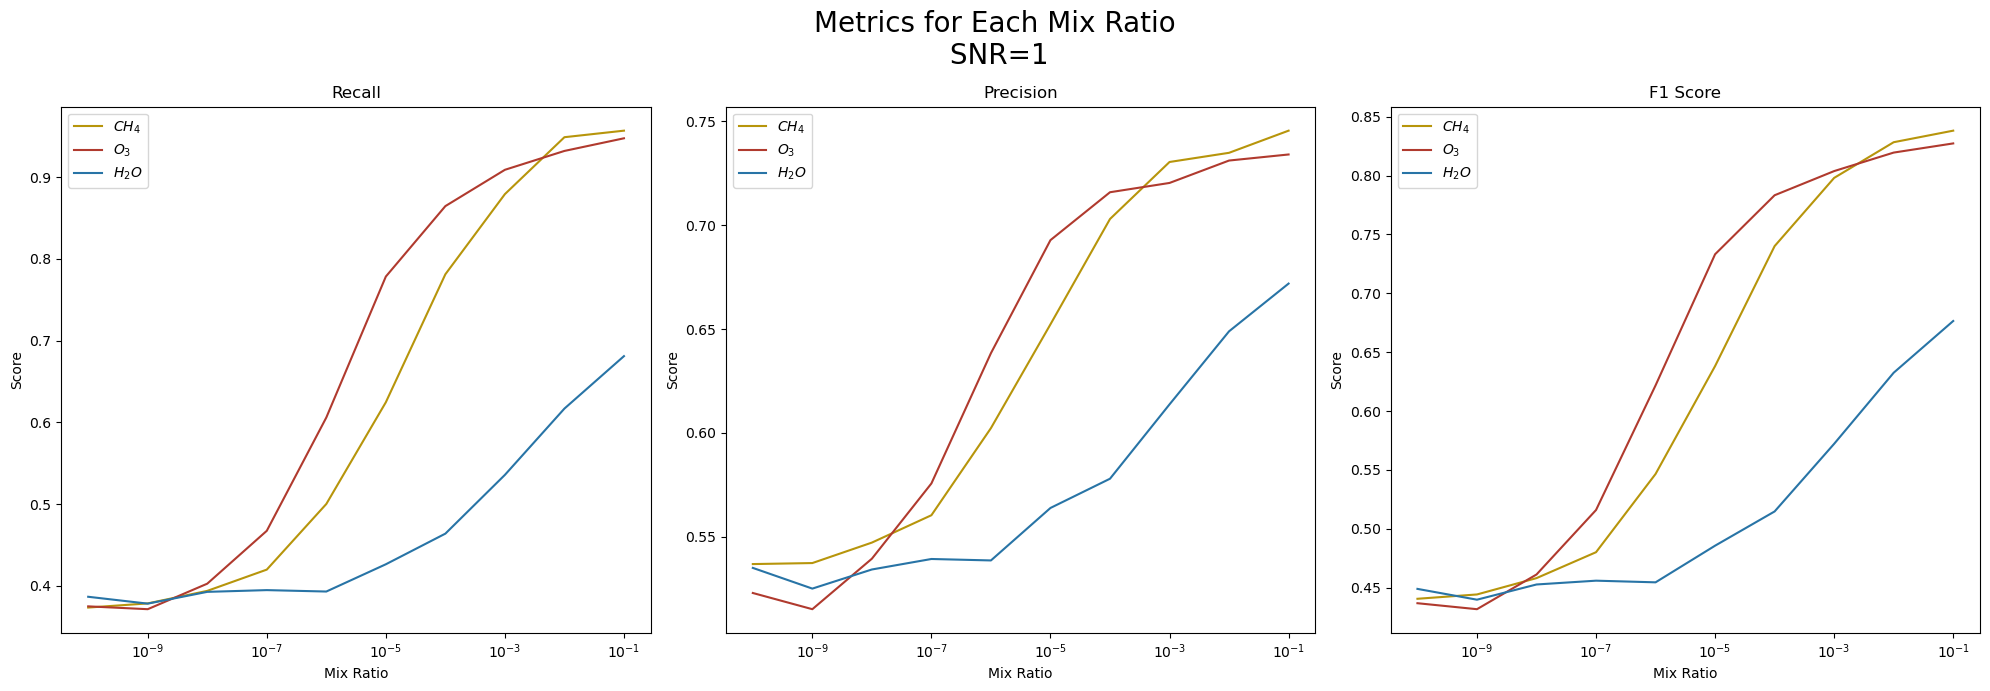

In [16]:
## CH4

CH4_SNR_test_by_atmCH4=[[] for i in range(10)]
mix_ratios = np.logspace(-10,-1,10)
for i, j in enumerate(range(-10,-0)):
    CH4_SNR_test_by_atmCH4[i]=SNR_test_df[SNR_test_df["atm CH4"]==j]
    co2=int(len(SNR_test_df[SNR_test_df["CH4 label"]==0])/10)
    no_CH4 = (
        SNR_test_df[SNR_test_df["CH4 label"]==0].sample(co2)
        )
    CH4_SNR_test_by_atmCH4[i]=pd.concat([CH4_SNR_test_by_atmCH4[i],
                                            no_CH4])
    
    
CH4_SNR_f1 = np.zeros(len(mix_ratios))
CH4_SNR_recall = np.zeros(len(mix_ratios))
CH4_SNR_precision = np.zeros(len(mix_ratios))
CH4_SNR_score = np.zeros(len(mix_ratios))

for j in range(len(mix_ratios)):
                
                CH4_SNR_f1[j] = f1_score(
                    CH4_SNR_test_by_atmCH4[j]["CH4 label"].astype(int),
                    CH4_SNR_test_by_atmCH4[j]["CH4 pred"].astype(int)
                    )
                
                CH4_SNR_recall[j] = recall_score(
                    CH4_SNR_test_by_atmCH4[j]["CH4 label"].astype(int),
                    CH4_SNR_test_by_atmCH4[j]["CH4 pred"].astype(int)
                    )
                
                CH4_SNR_precision[j]=precision_score(
                    CH4_SNR_test_by_atmCH4[j]["CH4 label"].astype(int),
                    CH4_SNR_test_by_atmCH4[j]["CH4 pred"].astype(int)
                    )
                
## O3             
O3_SNR_test_by_atmO3=[[] for i in range(10)]
mix_ratios = np.logspace(-10,-1,10)
for i, j in enumerate(range(-10,-0)):
    O3_SNR_test_by_atmO3[i]=SNR_test_df[SNR_test_df["atm O3"]==j]
    co2=int(len(SNR_test_df[SNR_test_df["O3 label"]==0])/10)
    no_O3 = (
        SNR_test_df[SNR_test_df["O3 label"]==0].sample(co2)
        )
    O3_SNR_test_by_atmO3[i]=pd.concat([O3_SNR_test_by_atmO3[i],
                                            no_O3])    
    
O3_SNR_f1 = np.zeros(len(mix_ratios))
O3_SNR_recall = np.zeros(len(mix_ratios))
O3_SNR_precision = np.zeros(len(mix_ratios))
O3_SNR_score = np.zeros(len(mix_ratios))

for j in range(len(mix_ratios)):
                
                O3_SNR_f1[j] = f1_score(
                    O3_SNR_test_by_atmO3[j]["O3 label"].astype(int),
                    O3_SNR_test_by_atmO3[j]["O3 pred"].astype(int)
                    )
                
                O3_SNR_recall[j] = recall_score(
                    O3_SNR_test_by_atmO3[j]["O3 label"].astype(int),
                    O3_SNR_test_by_atmO3[j]["O3 pred"].astype(int)
                    )
                
                O3_SNR_precision[j]=precision_score(
                    O3_SNR_test_by_atmO3[j]["O3 label"].astype(int),
                    O3_SNR_test_by_atmO3[j]["O3 pred"].astype(int)
                    )
                
                
## H2O

H2O_SNR_test_by_atmH2O=[[] for i in range(10)]
mix_ratios = np.logspace(-10,-1,10)
for i, j in enumerate(range(-10,-0)):
    H2O_SNR_test_by_atmH2O[i]=SNR_test_df[SNR_test_df["atm H2O"]==j]
    co2=int(len(SNR_test_df[SNR_test_df["H2O label"]==0])/10)
    no_H2O = (
        SNR_test_df[SNR_test_df["H2O label"]==0].sample(co2)
        )
    H2O_SNR_test_by_atmH2O[i]=pd.concat([H2O_SNR_test_by_atmH2O[i],
                                            no_H2O])
    
H2O_SNR_f1 = np.zeros(len(mix_ratios))
H2O_SNR_recall = np.zeros(len(mix_ratios))
H2O_SNR_precision = np.zeros(len(mix_ratios))
H2O_SNR_score = np.zeros(len(mix_ratios))

for j in range(len(mix_ratios)):
                
                H2O_SNR_f1[j] = f1_score(
                    H2O_SNR_test_by_atmH2O[j]["H2O label"].astype(int),
                    H2O_SNR_test_by_atmH2O[j]["H2O pred"].astype(int)
                    )
                
                H2O_SNR_recall[j] = recall_score(
                    H2O_SNR_test_by_atmH2O[j]["H2O label"].astype(int),
                    H2O_SNR_test_by_atmH2O[j]["H2O pred"].astype(int)
                    )
                
                H2O_SNR_precision[j]=precision_score(
                    H2O_SNR_test_by_atmH2O[j]["H2O label"].astype(int),
                    H2O_SNR_test_by_atmH2O[j]["H2O pred"].astype(int)
                    )
                
## plot metrics
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

ax[2].plot(mix_ratios, CH4_SNR_f1, label="$CH_4$", color= "#B7950B")
ax[2].plot(mix_ratios, O3_SNR_f1, label="$O_3$",color= "#B03A2E")
ax[2].plot(mix_ratios, H2O_SNR_f1, label="$H_2O$",color= "#2874A6")
ax[2].set_xscale("log")
ax[2].set_xlabel("Mix Ratio")
ax[2].set_ylabel("Score")
ax[2].set_title("F1 Score")
ax[2].legend()

ax[0].plot(mix_ratios, CH4_SNR_recall, label="$CH_4$", color= "#B7950B")
ax[0].plot(mix_ratios, O3_SNR_recall, label="$O_3$",color= "#B03A2E")
ax[0].plot(mix_ratios, H2O_SNR_recall, label="$H_2O$", color= "#2874A6")
ax[0].set_xscale("log")
ax[0].set_xlabel("Mix Ratio")
ax[0].set_ylabel("Score")
ax[0].set_title("Recall")
ax[0].legend()

ax[1].plot(mix_ratios, CH4_SNR_precision, label="$CH_4$", color= "#B7950B")
ax[1].plot(mix_ratios, O3_SNR_precision, label="$O_3$",color= "#B03A2E")
ax[1].plot(mix_ratios, H2O_SNR_precision, label="$H_2O$", color= "#2874A6")
ax[1].set_xscale("log")
ax[1].set_xlabel("Mix Ratio")
ax[1].set_ylabel("Score")
ax[1].set_title("Precision")
ax[1].legend()

plt.suptitle(f"Metrics for Each Mix Ratio\n SNR={SNR}", fontsize=20)
plt.tight_layout()

## Validate per SNR

SNR=1
SNR= 1
CH4 SCORES
[[49893 25107]
 [28290 46710]]
              precision    recall  f1-score   support

           0       0.64      0.67      0.65     75000
           1       0.65      0.62      0.64     75000

    accuracy                           0.64    150000
   macro avg       0.64      0.64      0.64    150000
weighted avg       0.64      0.64      0.64    150000


 ----------
O3 SCORES
[[45183 29817]
 [22287 52713]]
              precision    recall  f1-score   support

           0       0.67      0.60      0.63     75000
           1       0.64      0.70      0.67     75000

    accuracy                           0.65    150000
   macro avg       0.65      0.65      0.65    150000
weighted avg       0.65      0.65      0.65    150000


 ----------
H2O SCORES
[[50006 24994]
 [40213 34787]]
              precision    recall  f1-score   support

           0       0.55      0.67      0.61     75000
           1       0.58      0.46      0.52     75000

    accuracy      

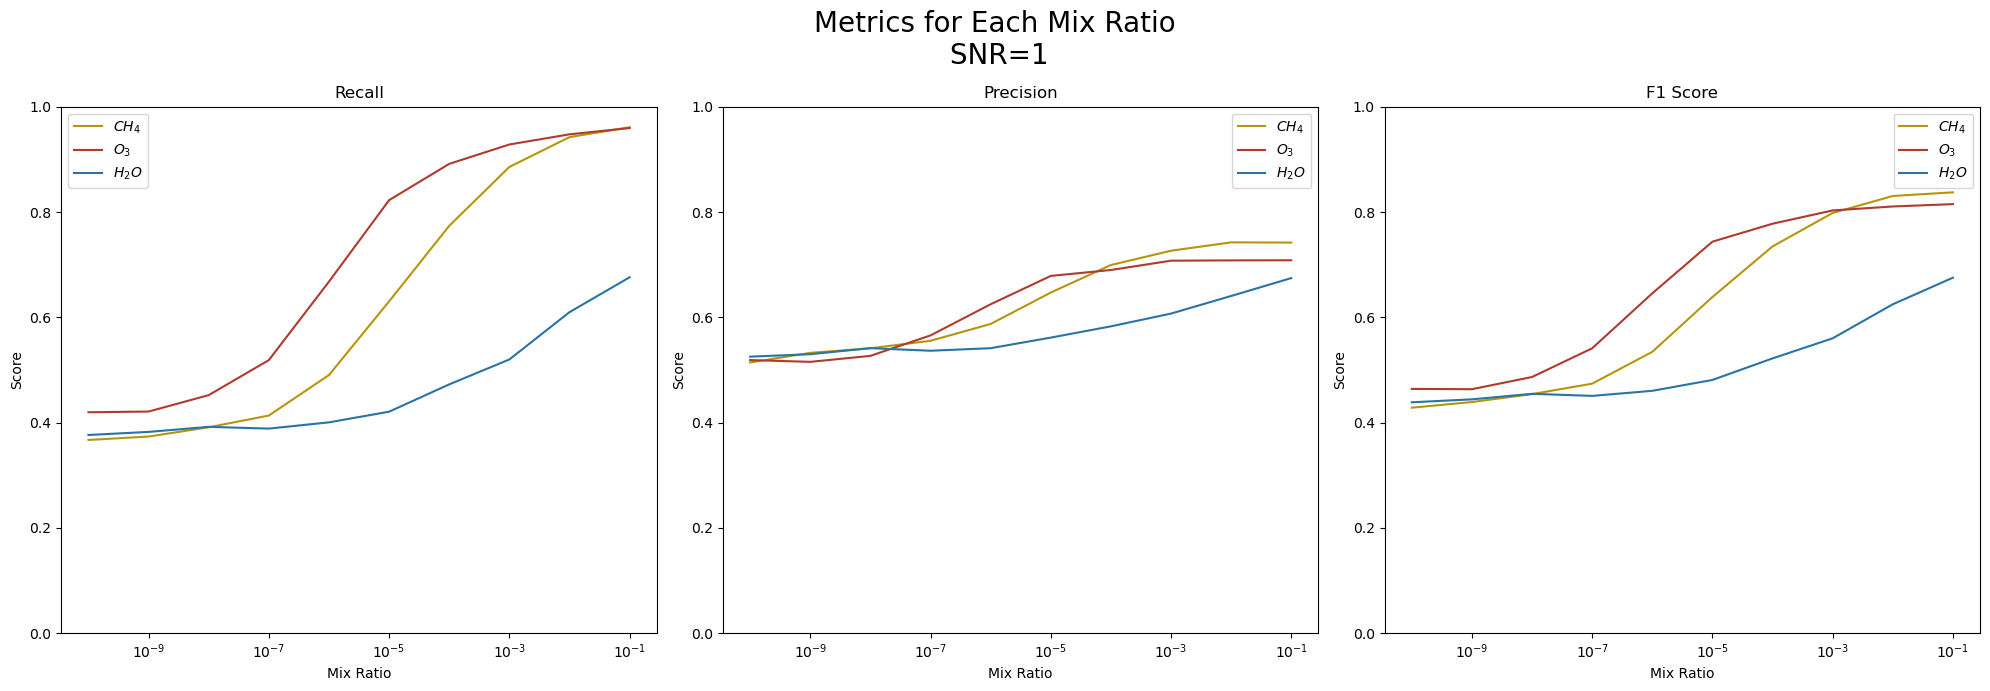

SNR=2
SNR= 2
CH4 SCORES
[[59745 15255]
 [28242 46758]]
              precision    recall  f1-score   support

           0       0.68      0.80      0.73     75000
           1       0.75      0.62      0.68     75000

    accuracy                           0.71    150000
   macro avg       0.72      0.71      0.71    150000
weighted avg       0.72      0.71      0.71    150000


 ----------
O3 SCORES
[[56833 18167]
 [21595 53405]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74     75000
           1       0.75      0.71      0.73     75000

    accuracy                           0.73    150000
   macro avg       0.74      0.73      0.73    150000
weighted avg       0.74      0.73      0.73    150000


 ----------
H2O SCORES
[[51360 23640]
 [32953 42047]]
              precision    recall  f1-score   support

           0       0.61      0.68      0.64     75000
           1       0.64      0.56      0.60     75000

    accuracy      

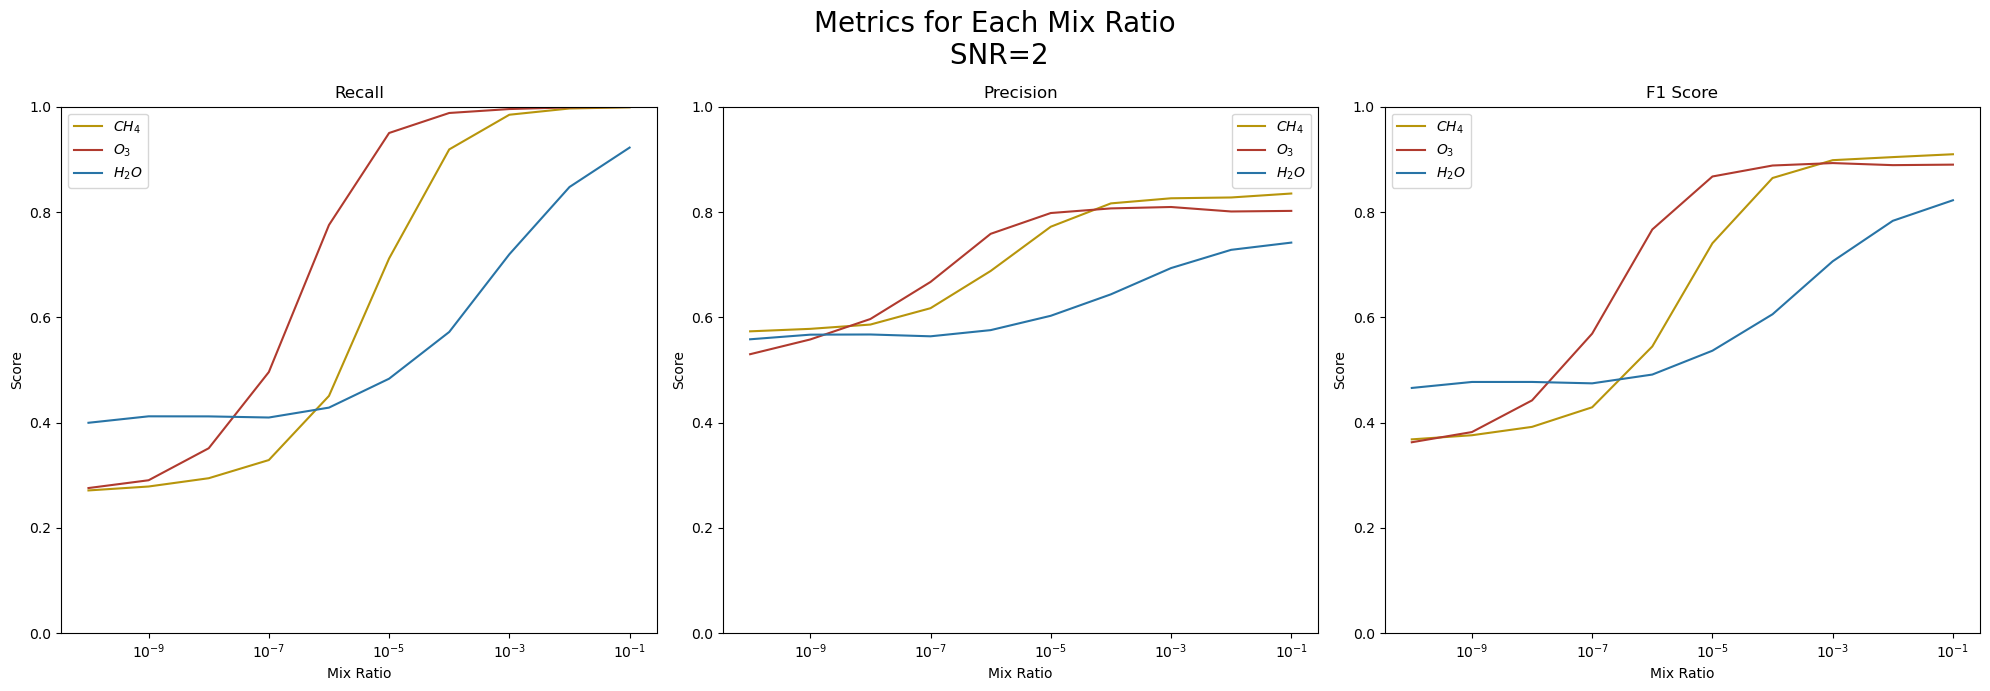

SNR=3
SNR= 3
CH4 SCORES
[[62732 12268]
 [28257 46743]]
              precision    recall  f1-score   support

           0       0.69      0.84      0.76     75000
           1       0.79      0.62      0.70     75000

    accuracy                           0.73    150000
   macro avg       0.74      0.73      0.73    150000
weighted avg       0.74      0.73      0.73    150000


 ----------
O3 SCORES
[[64257 10743]
 [22810 52190]]
              precision    recall  f1-score   support

           0       0.74      0.86      0.79     75000
           1       0.83      0.70      0.76     75000

    accuracy                           0.78    150000
   macro avg       0.78      0.78      0.77    150000
weighted avg       0.78      0.78      0.77    150000


 ----------
H2O SCORES
[[52269 22731]
 [28998 46002]]
              precision    recall  f1-score   support

           0       0.64      0.70      0.67     75000
           1       0.67      0.61      0.64     75000

    accuracy      

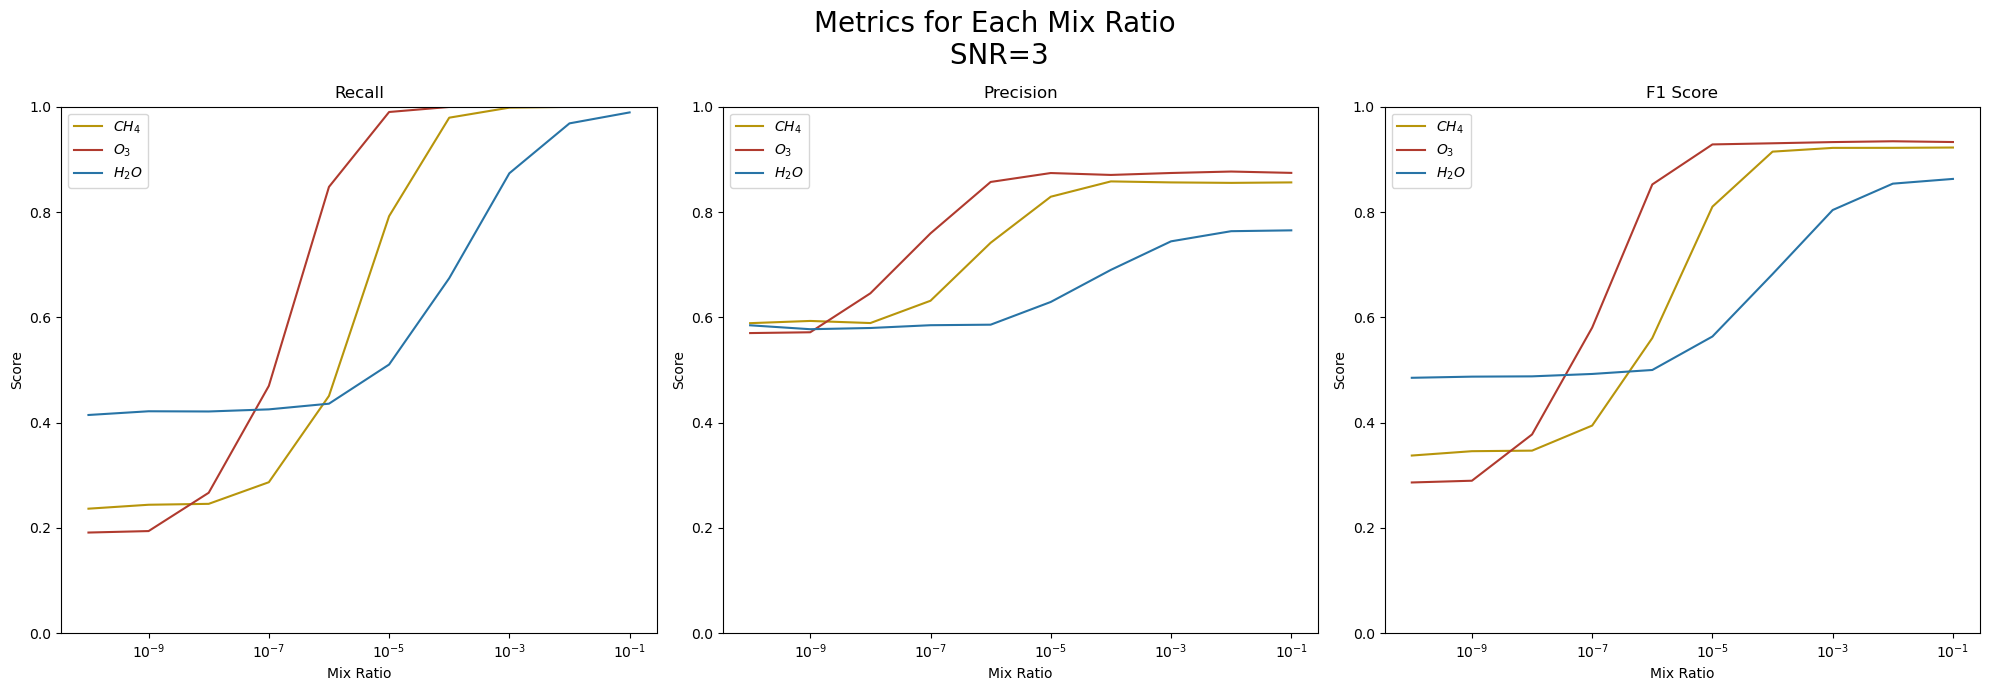

SNR=4
SNR= 4
CH4 SCORES
[[63851 11149]
 [27540 47460]]
              precision    recall  f1-score   support

           0       0.70      0.85      0.77     75000
           1       0.81      0.63      0.71     75000

    accuracy                           0.74    150000
   macro avg       0.75      0.74      0.74    150000
weighted avg       0.75      0.74      0.74    150000


 ----------
O3 SCORES
[[67913  7087]
 [23331 51669]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.82     75000
           1       0.88      0.69      0.77     75000

    accuracy                           0.80    150000
   macro avg       0.81      0.80      0.79    150000
weighted avg       0.81      0.80      0.79    150000


 ----------
H2O SCORES
[[52442 22558]
 [26712 48288]]
              precision    recall  f1-score   support

           0       0.66      0.70      0.68     75000
           1       0.68      0.64      0.66     75000

    accuracy      

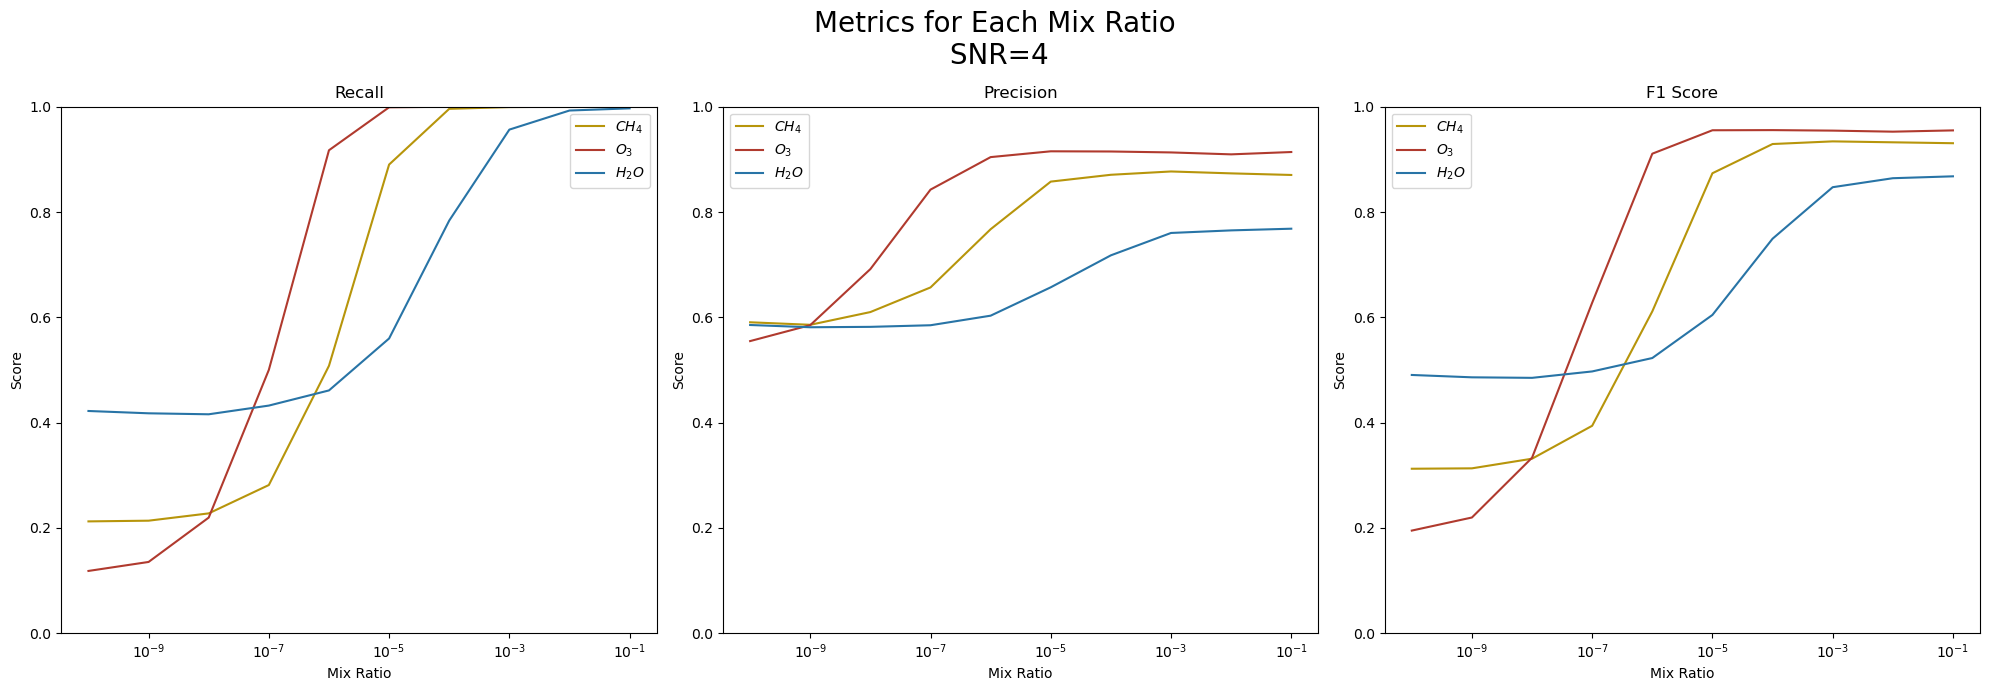

SNR=5
SNR= 5
CH4 SCORES
[[65158  9842]
 [26895 48105]]
              precision    recall  f1-score   support

           0       0.71      0.87      0.78     75000
           1       0.83      0.64      0.72     75000

    accuracy                           0.76    150000
   macro avg       0.77      0.76      0.75    150000
weighted avg       0.77      0.76      0.75    150000


 ----------
O3 SCORES
[[69647  5353]
 [22893 52107]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83     75000
           1       0.91      0.69      0.79     75000

    accuracy                           0.81    150000
   macro avg       0.83      0.81      0.81    150000
weighted avg       0.83      0.81      0.81    150000


 ----------
H2O SCORES
[[52984 22016]
 [25679 49321]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69     75000
           1       0.69      0.66      0.67     75000

    accuracy      

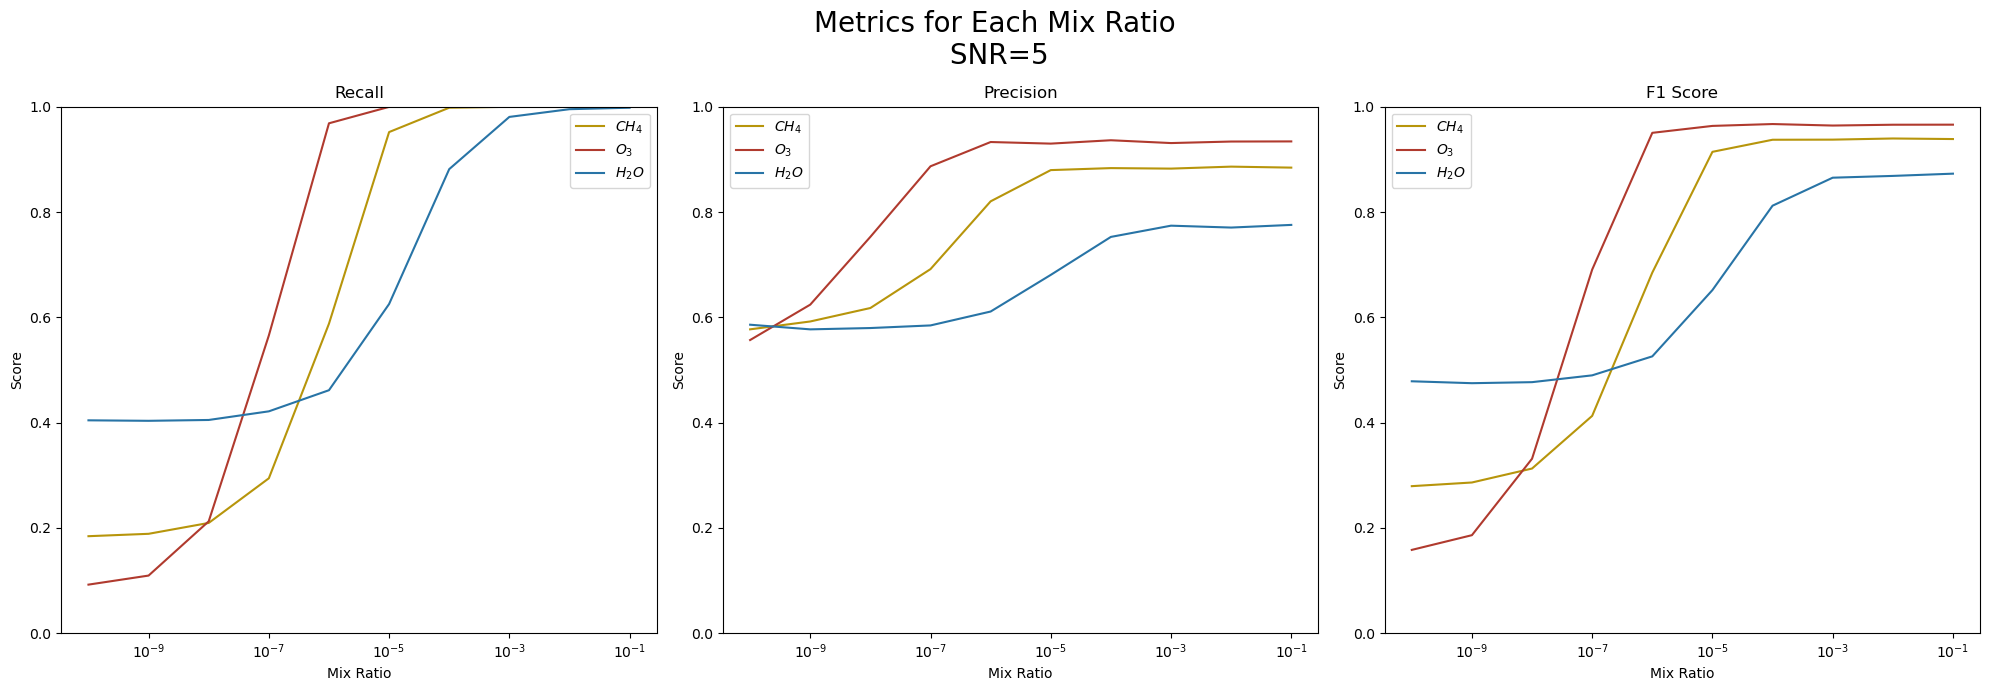

SNR=6
SNR= 6
CH4 SCORES
[[66389  8611]
 [26347 48653]]
              precision    recall  f1-score   support

           0       0.72      0.89      0.79     75000
           1       0.85      0.65      0.74     75000

    accuracy                           0.77    150000
   macro avg       0.78      0.77      0.76    150000
weighted avg       0.78      0.77      0.76    150000


 ----------
O3 SCORES
[[70821  4179]
 [22456 52544]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84     75000
           1       0.93      0.70      0.80     75000

    accuracy                           0.82    150000
   macro avg       0.84      0.82      0.82    150000
weighted avg       0.84      0.82      0.82    150000


 ----------
H2O SCORES
[[54118 20882]
 [25505 49495]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70     75000
           1       0.70      0.66      0.68     75000

    accuracy      

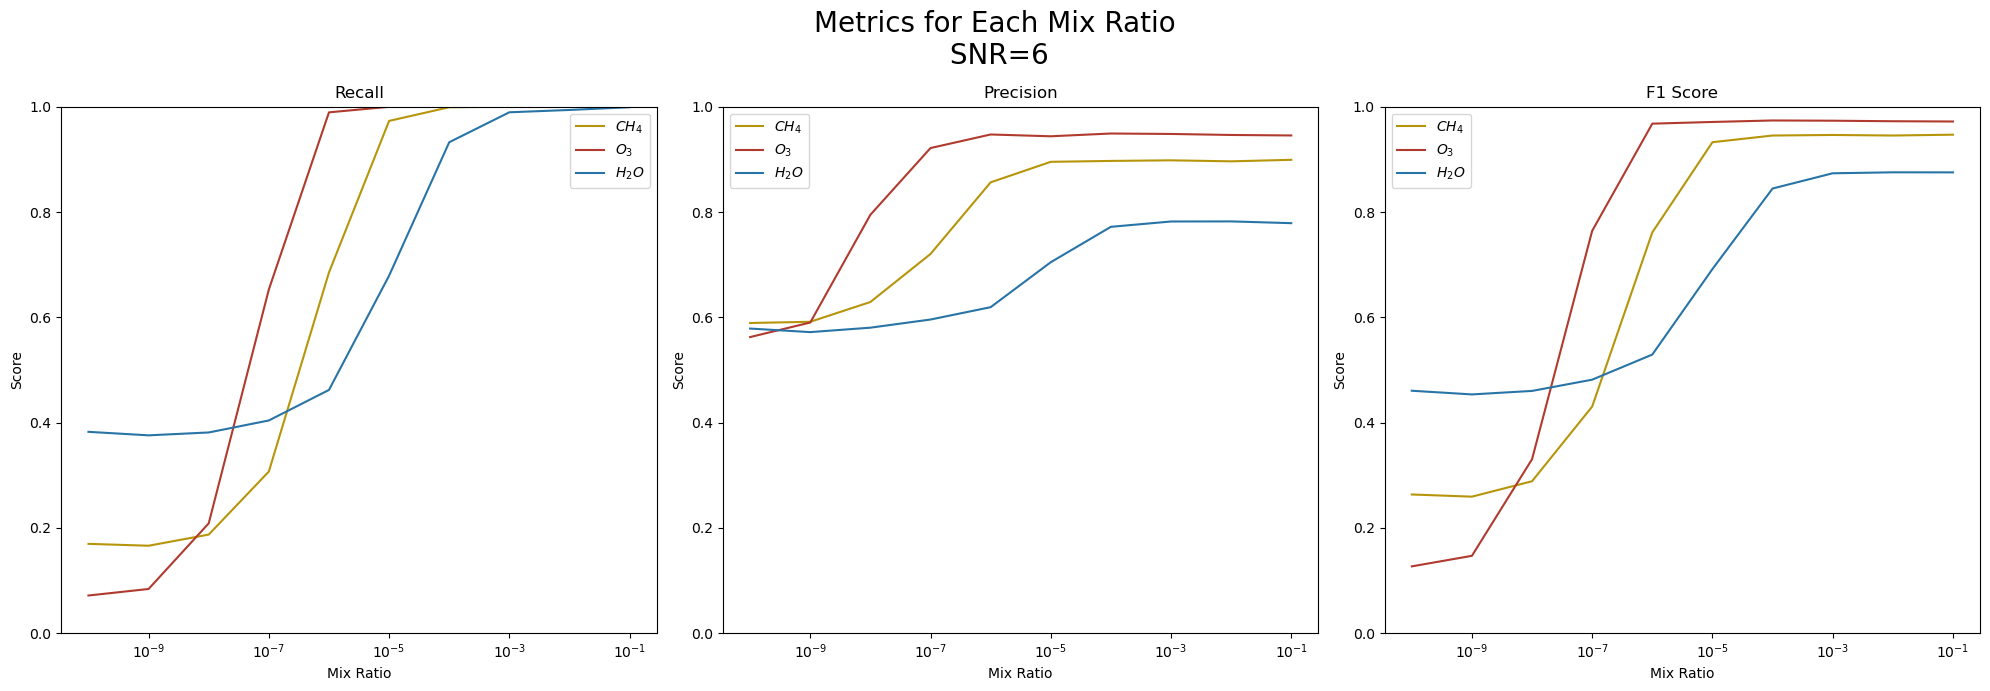

SNR=7
SNR= 7
CH4 SCORES
[[67333  7667]
 [26058 48942]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80     75000
           1       0.86      0.65      0.74     75000

    accuracy                           0.78    150000
   macro avg       0.79      0.78      0.77    150000
weighted avg       0.79      0.78      0.77    150000


 ----------
O3 SCORES
[[71406  3594]
 [21768 53232]]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85     75000
           1       0.94      0.71      0.81     75000

    accuracy                           0.83    150000
   macro avg       0.85      0.83      0.83    150000
weighted avg       0.85      0.83      0.83    150000


 ----------
H2O SCORES
[[55365 19635]
 [25545 49455]]
              precision    recall  f1-score   support

           0       0.68      0.74      0.71     75000
           1       0.72      0.66      0.69     75000

    accuracy      

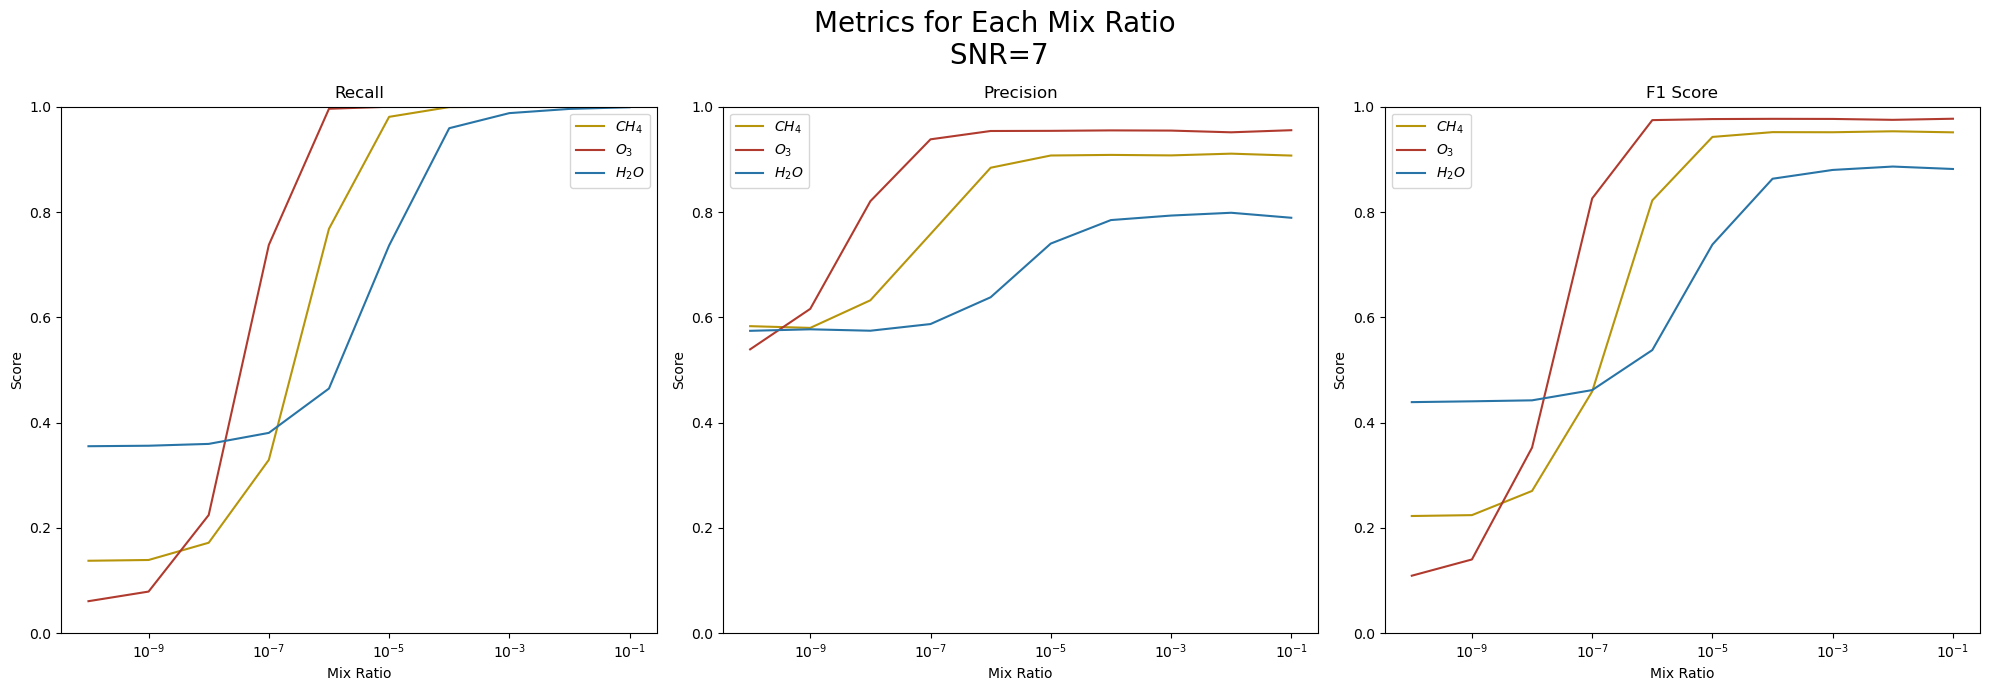

SNR=8
SNR= 8
CH4 SCORES
[[68362  6638]
 [26078 48922]]
              precision    recall  f1-score   support

           0       0.72      0.91      0.81     75000
           1       0.88      0.65      0.75     75000

    accuracy                           0.78    150000
   macro avg       0.80      0.78      0.78    150000
weighted avg       0.80      0.78      0.78    150000


 ----------
O3 SCORES
[[72156  2844]
 [21481 53519]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86     75000
           1       0.95      0.71      0.81     75000

    accuracy                           0.84    150000
   macro avg       0.86      0.84      0.84    150000
weighted avg       0.86      0.84      0.84    150000


 ----------
H2O SCORES
[[57018 17982]
 [26291 48709]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72     75000
           1       0.73      0.65      0.69     75000

    accuracy      

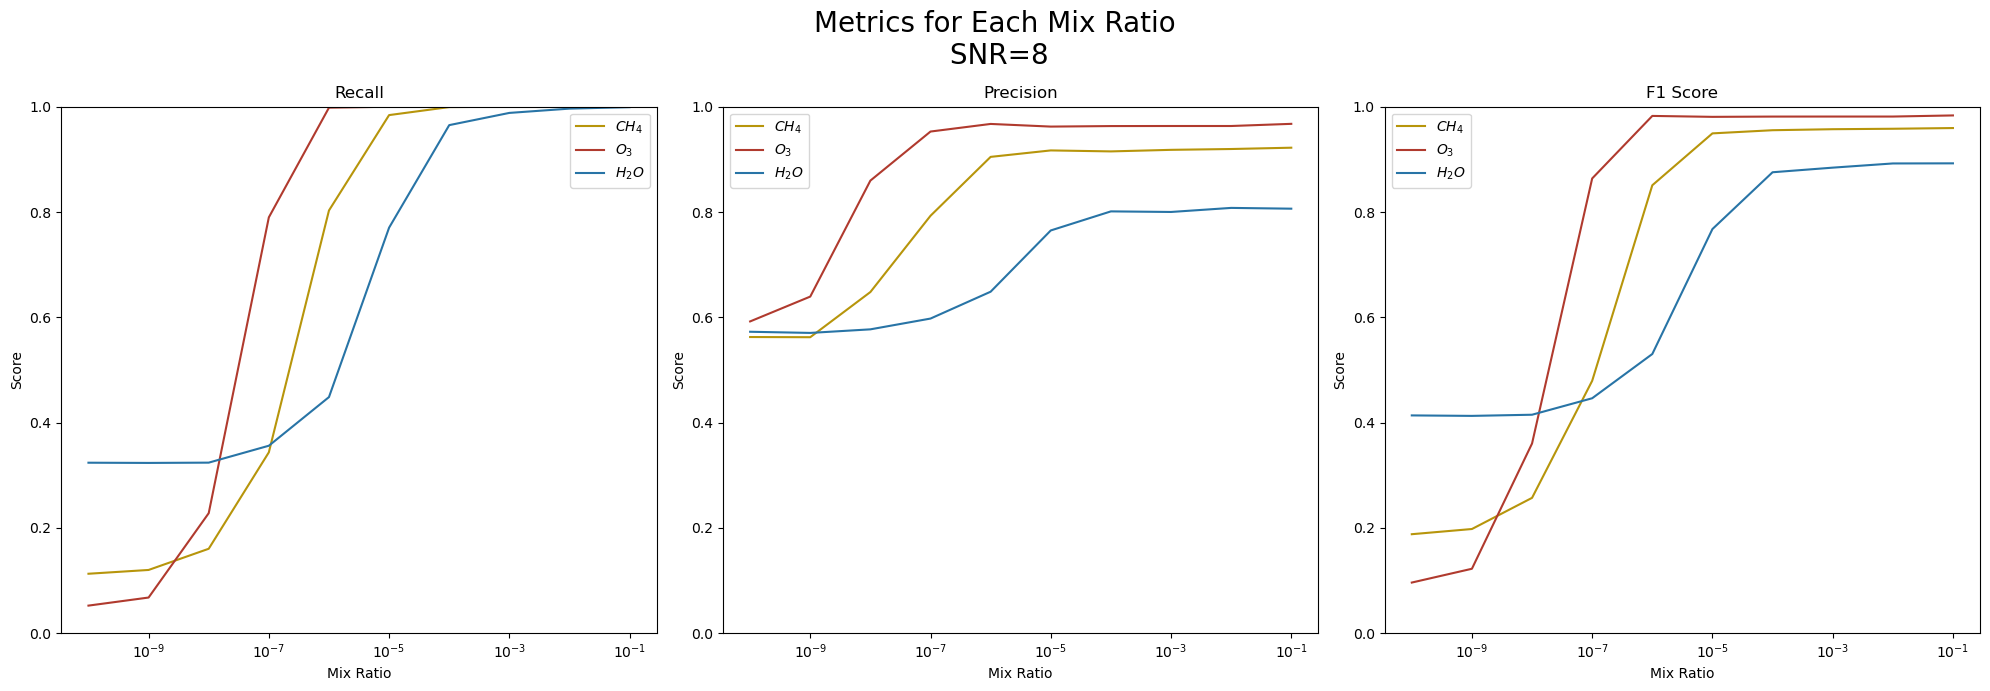

SNR=9
SNR= 9
CH4 SCORES
[[69037  5963]
 [25784 49216]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.81     75000
           1       0.89      0.66      0.76     75000

    accuracy                           0.79    150000
   macro avg       0.81      0.79      0.78    150000
weighted avg       0.81      0.79      0.78    150000


 ----------
O3 SCORES
[[72646  2354]
 [21105 53895]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.86     75000
           1       0.96      0.72      0.82     75000

    accuracy                           0.84    150000
   macro avg       0.87      0.84      0.84    150000
weighted avg       0.87      0.84      0.84    150000


 ----------
H2O SCORES
[[58443 16557]
 [26627 48373]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73     75000
           1       0.75      0.64      0.69     75000

    accuracy      

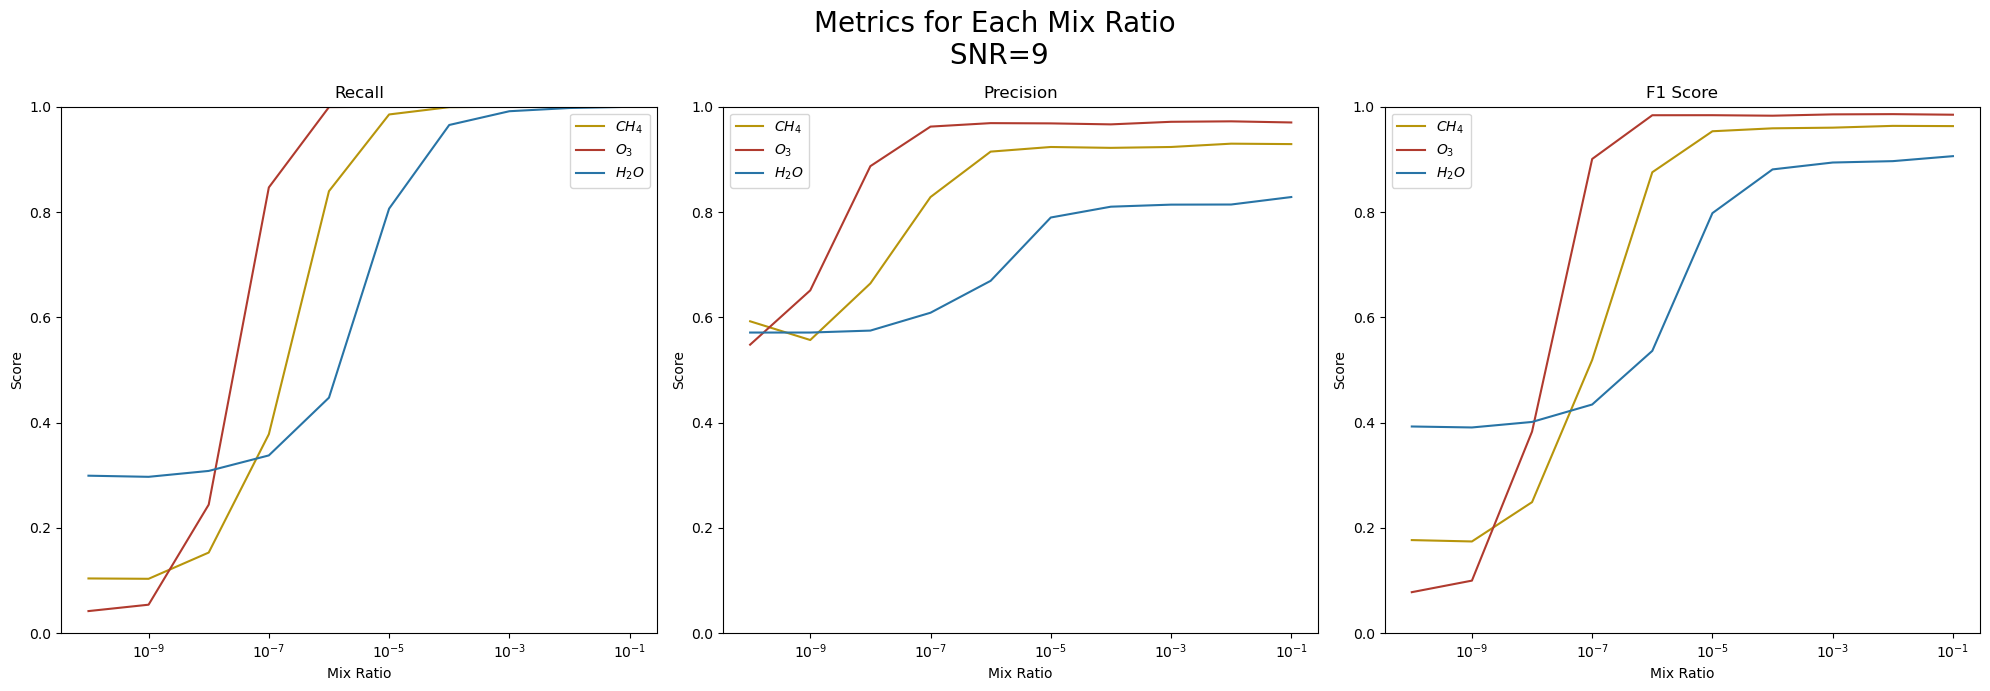

SNR=10
SNR= 10
CH4 SCORES
[[69862  5138]
 [25667 49333]]
              precision    recall  f1-score   support

           0       0.73      0.93      0.82     75000
           1       0.91      0.66      0.76     75000

    accuracy                           0.79    150000
   macro avg       0.82      0.79      0.79    150000
weighted avg       0.82      0.79      0.79    150000


 ----------
O3 SCORES
[[73055  1945]
 [20836 54164]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.87     75000
           1       0.97      0.72      0.83     75000

    accuracy                           0.85    150000
   macro avg       0.87      0.85      0.85    150000
weighted avg       0.87      0.85      0.85    150000


 ----------
H2O SCORES
[[59639 15361]
 [27311 47689]]
              precision    recall  f1-score   support

           0       0.69      0.80      0.74     75000
           1       0.76      0.64      0.69     75000

    accuracy    

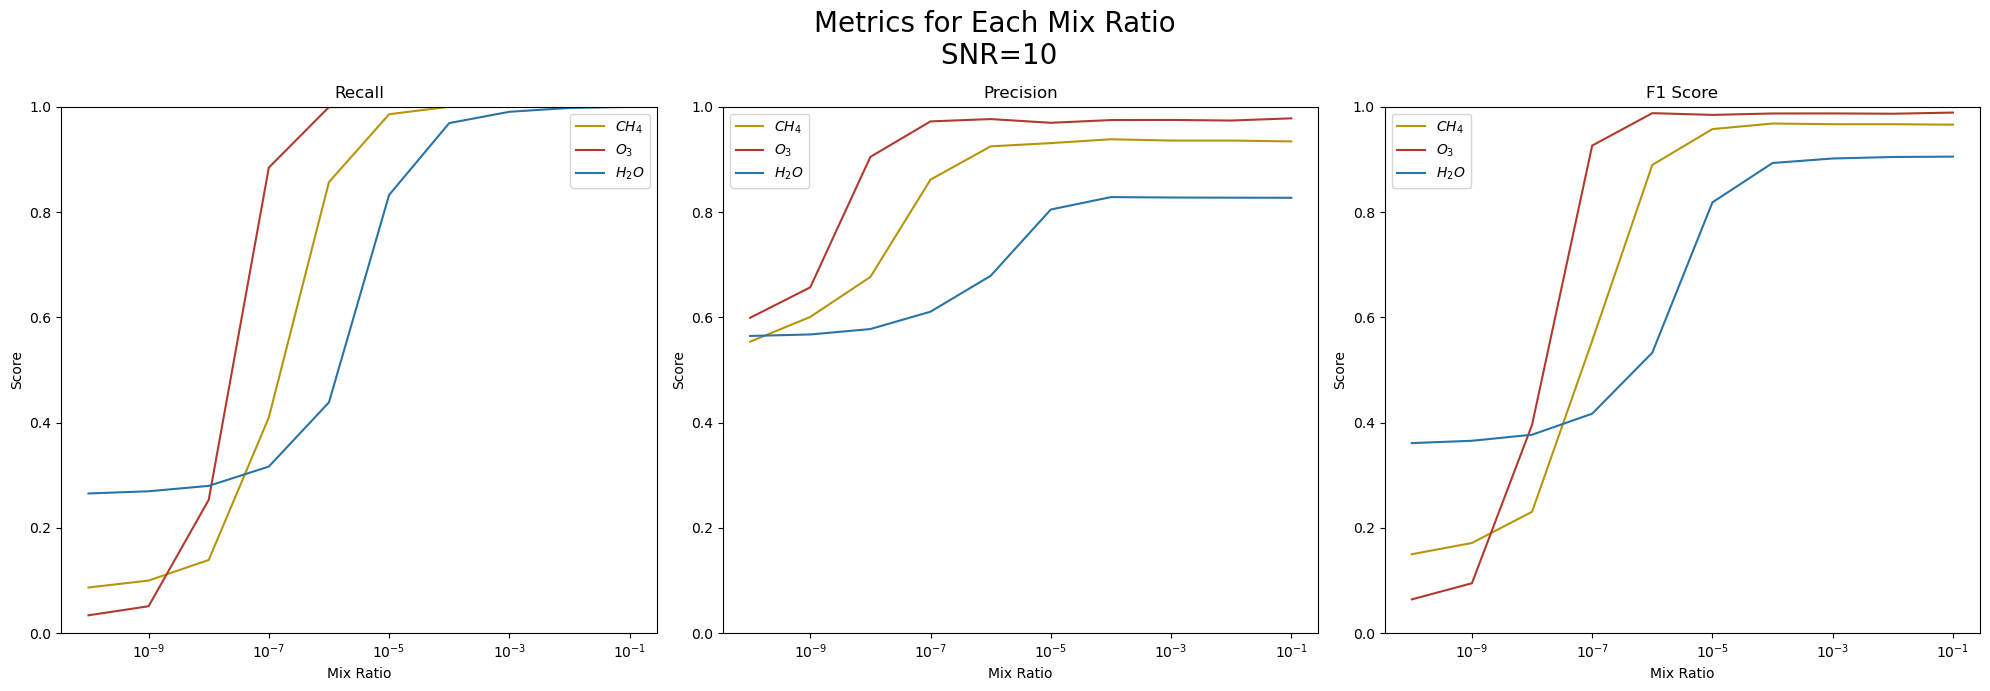

SNR=13
SNR= 13
CH4 SCORES
[[71103  3897]
 [24983 50017]]
              precision    recall  f1-score   support

           0       0.74      0.95      0.83     75000
           1       0.93      0.67      0.78     75000

    accuracy                           0.81    150000
   macro avg       0.83      0.81      0.80    150000
weighted avg       0.83      0.81      0.80    150000


 ----------
O3 SCORES
[[73840  1160]
 [20142 54858]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.87     75000
           1       0.98      0.73      0.84     75000

    accuracy                           0.86    150000
   macro avg       0.88      0.86      0.86    150000
weighted avg       0.88      0.86      0.86    150000


 ----------
H2O SCORES
[[62164 12836]
 [28017 46983]]
              precision    recall  f1-score   support

           0       0.69      0.83      0.75     75000
           1       0.79      0.63      0.70     75000

    accuracy    

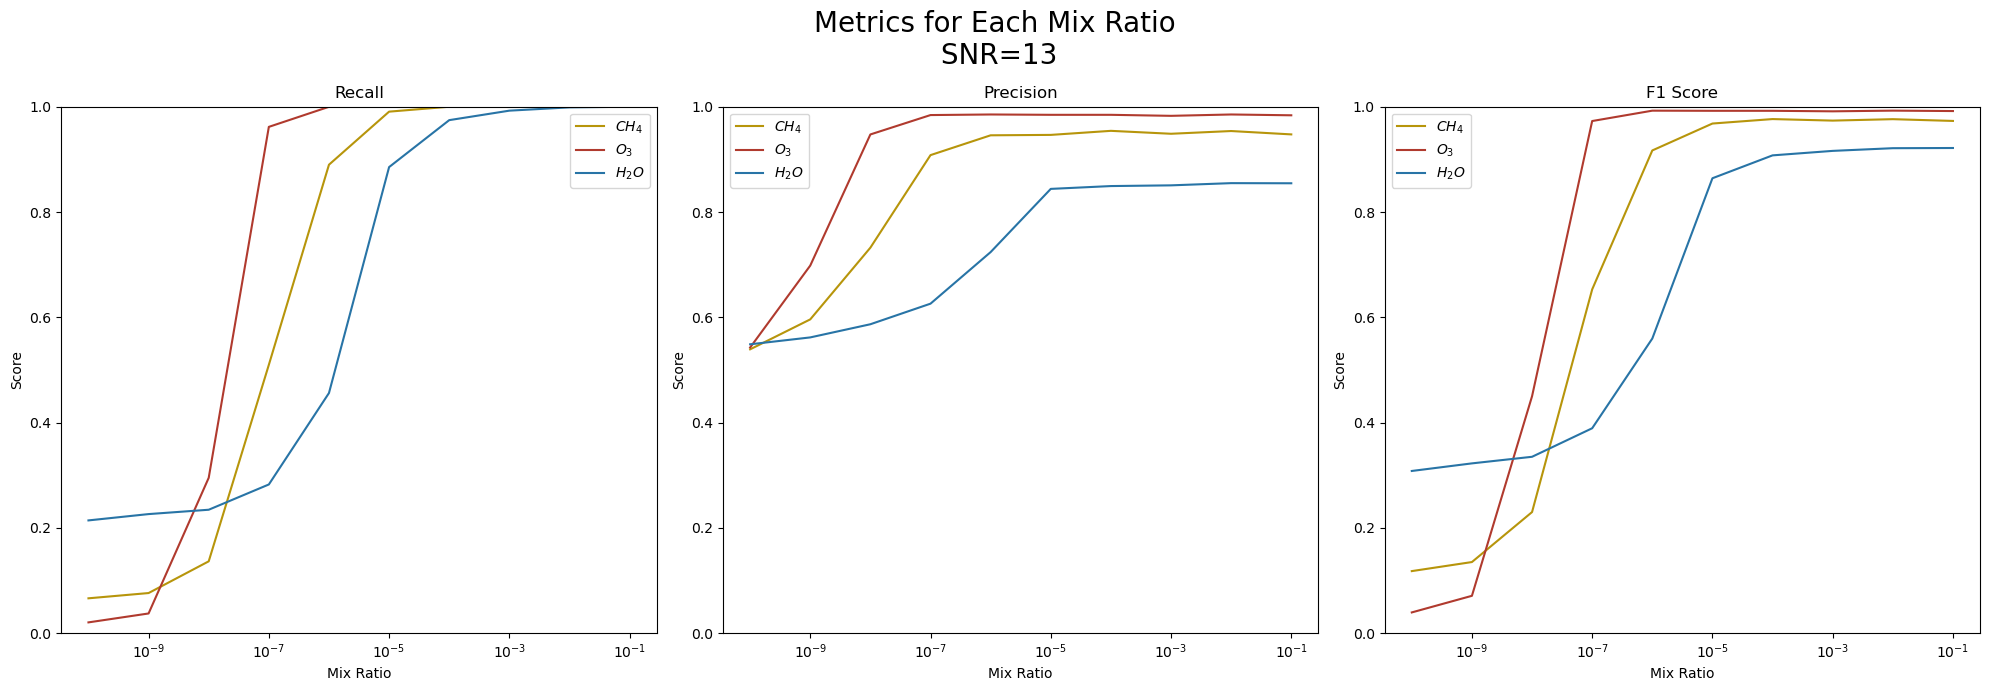

SNR=15
SNR= 15
CH4 SCORES
[[71675  3325]
 [24417 50583]]
              precision    recall  f1-score   support

           0       0.75      0.96      0.84     75000
           1       0.94      0.67      0.78     75000

    accuracy                           0.82    150000
   macro avg       0.84      0.82      0.81    150000
weighted avg       0.84      0.82      0.81    150000


 ----------
O3 SCORES
[[74101   899]
 [19739 55261]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     75000
           1       0.98      0.74      0.84     75000

    accuracy                           0.86    150000
   macro avg       0.89      0.86      0.86    150000
weighted avg       0.89      0.86      0.86    150000


 ----------
H2O SCORES
[[63569 11431]
 [28221 46779]]
              precision    recall  f1-score   support

           0       0.69      0.85      0.76     75000
           1       0.80      0.62      0.70     75000

    accuracy    

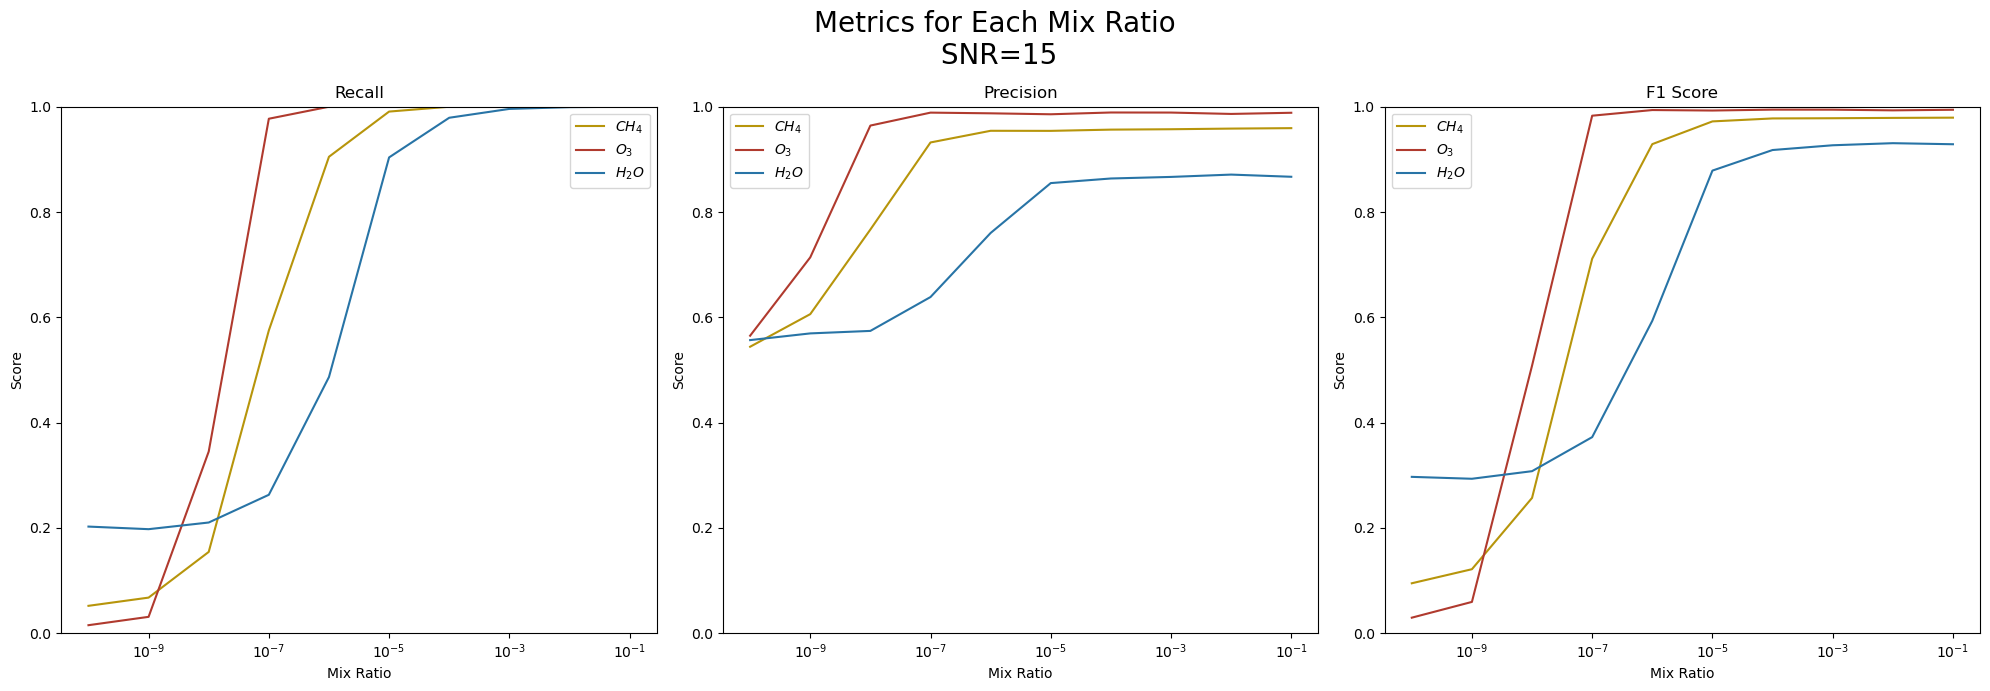

SNR=18
SNR= 18
CH4 SCORES
[[72606  2394]
 [23907 51093]]
              precision    recall  f1-score   support

           0       0.75      0.97      0.85     75000
           1       0.96      0.68      0.80     75000

    accuracy                           0.82    150000
   macro avg       0.85      0.82      0.82    150000
weighted avg       0.85      0.82      0.82    150000


 ----------
O3 SCORES
[[74414   586]
 [19182 55818]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     75000
           1       0.99      0.74      0.85     75000

    accuracy                           0.87    150000
   macro avg       0.89      0.87      0.87    150000
weighted avg       0.89      0.87      0.87    150000


 ----------
H2O SCORES
[[65152  9848]
 [28732 46268]]
              precision    recall  f1-score   support

           0       0.69      0.87      0.77     75000
           1       0.82      0.62      0.71     75000

    accuracy    

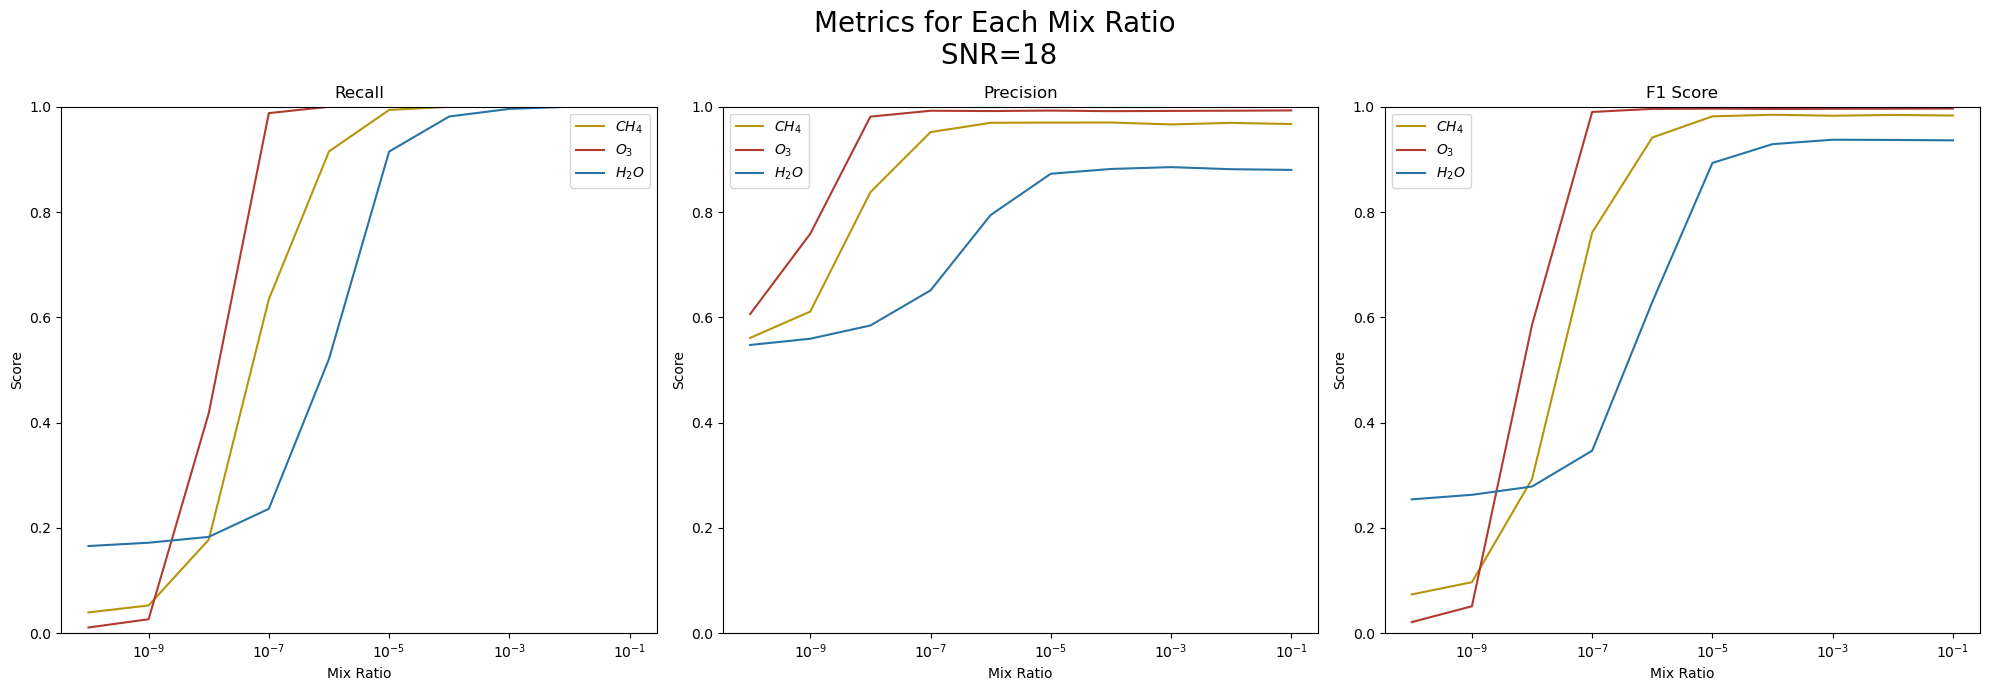

SNR=20
SNR= 20
CH4 SCORES
[[73101  1899]
 [23943 51057]]
              precision    recall  f1-score   support

           0       0.75      0.97      0.85     75000
           1       0.96      0.68      0.80     75000

    accuracy                           0.83    150000
   macro avg       0.86      0.83      0.82    150000
weighted avg       0.86      0.83      0.82    150000


 ----------
O3 SCORES
[[74567   433]
 [18900 56100]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     75000
           1       0.99      0.75      0.85     75000

    accuracy                           0.87    150000
   macro avg       0.90      0.87      0.87    150000
weighted avg       0.90      0.87      0.87    150000


 ----------
H2O SCORES
[[66198  8802]
 [29258 45742]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.78     75000
           1       0.84      0.61      0.71     75000

    accuracy    

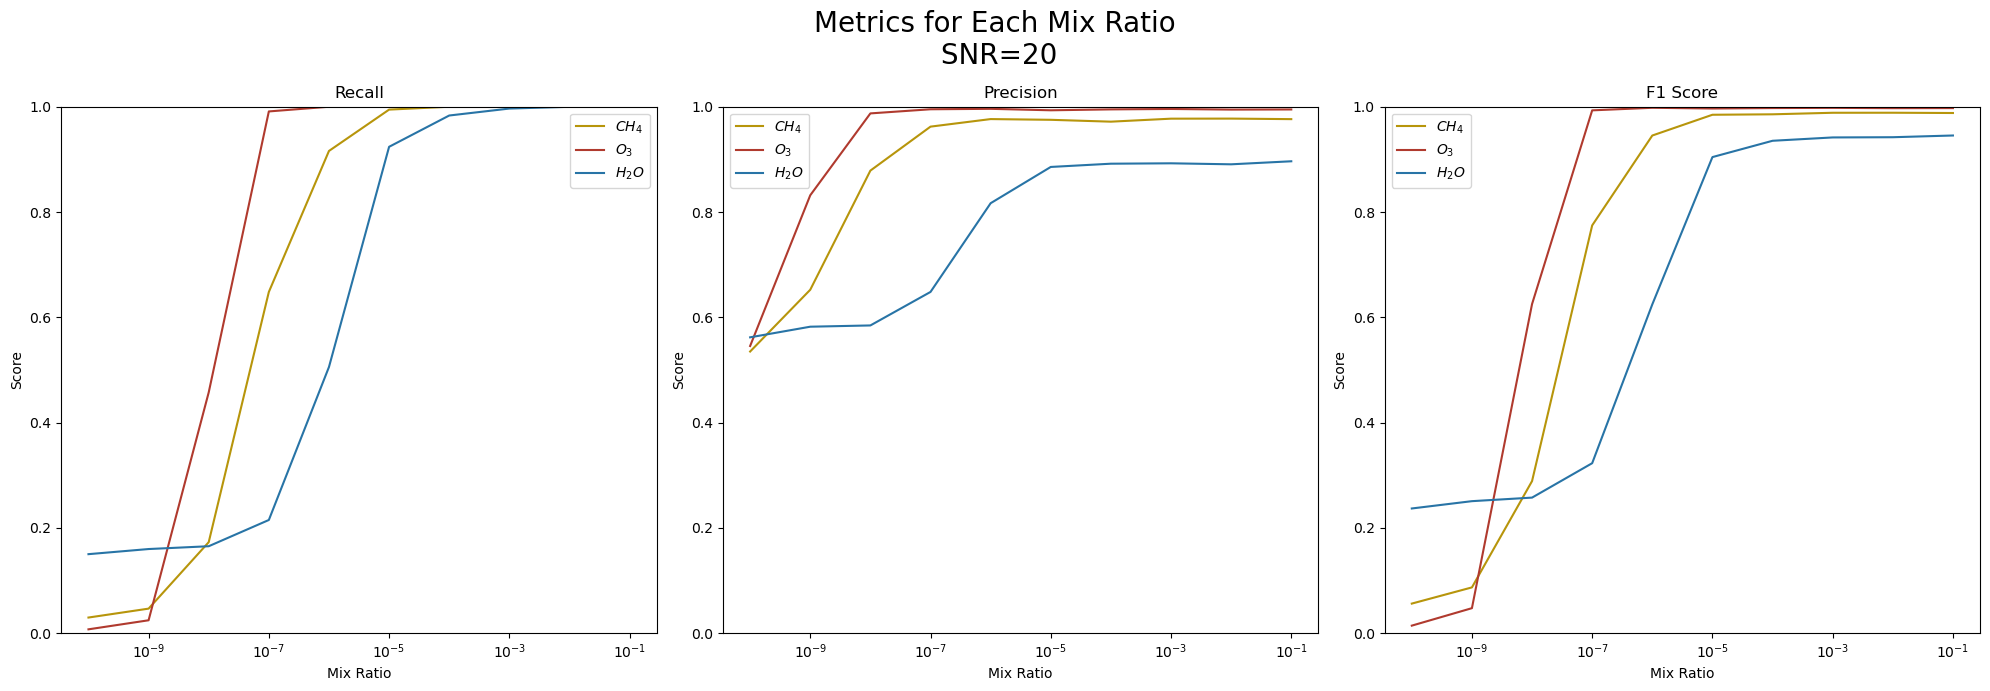

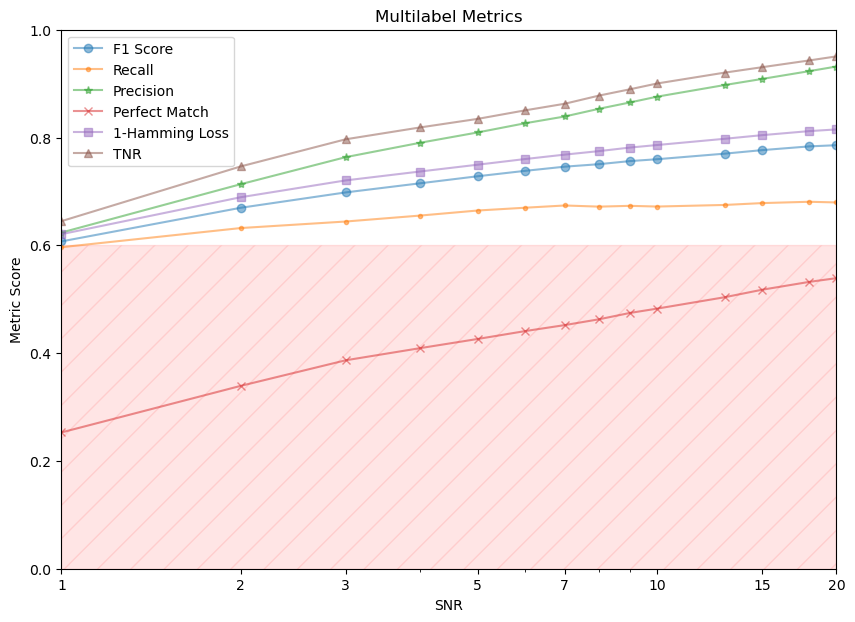

[1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-07, 1e-07]


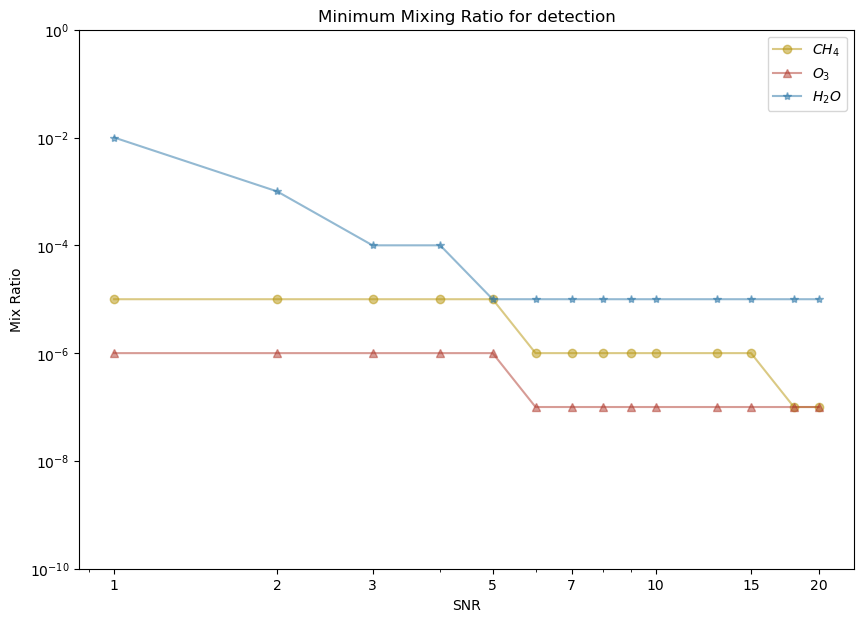

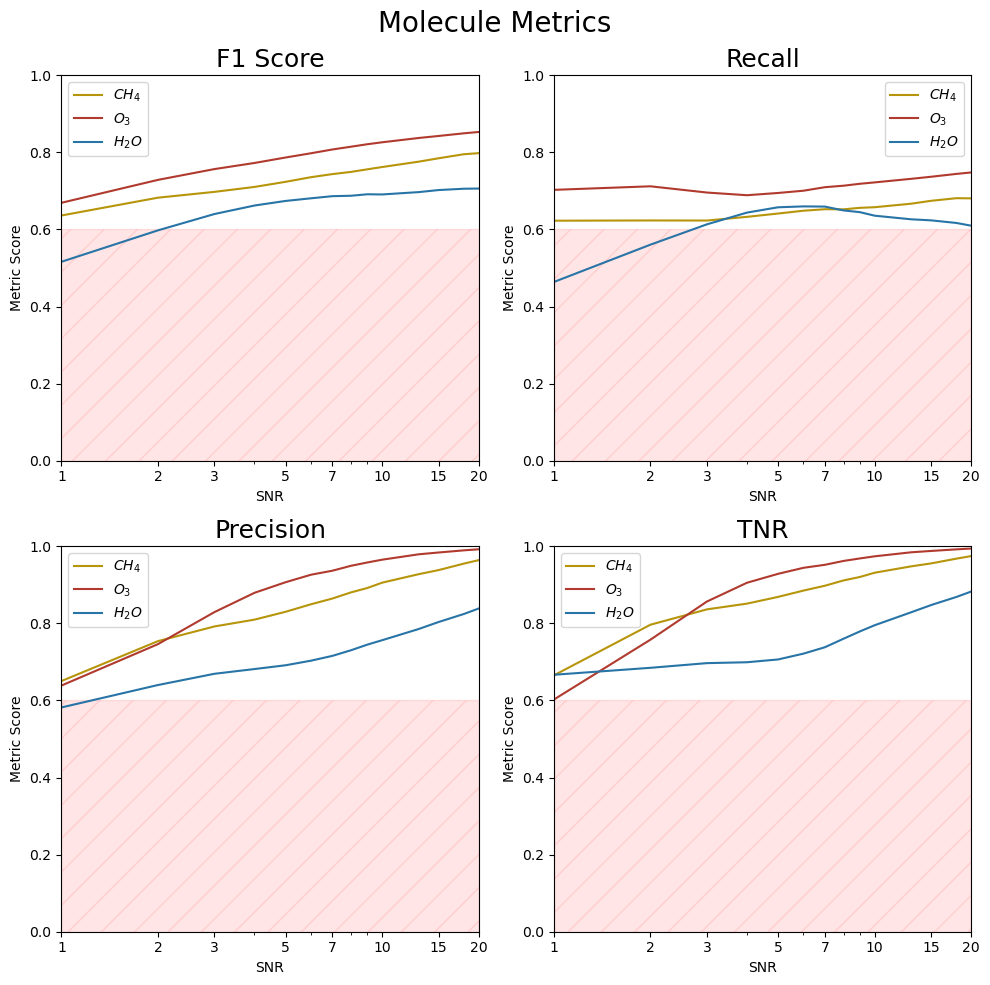

In [17]:
SNRS=[1,2,3,4,5,6,7,8,9,10,13,15,18,20]

mol_SNR_scores = dict(
    SNR=[],
    f1= [ [] , [] , [] ],
    recall_score = [ [] , [] , [] ],
    precision_score= [ [] , [] , [] ],
    accuracy= [ [] , [] , [] ],
    min_mix_ratio= [ [] , [] , [] ],
    TNR= [ [] , [] , [] ],
)

global_SNR_scores = dict(
    SNR=[],
    f1=[],
    recall=[],
    precision=[],
    perfect_match=[],
    hamming_loss=[],
    TNR=[]       
)
    

for i,SNR in enumerate(SNRS):
    print(f"SNR={SNR}")
    SNR_test_CO2_data = mrex.generate_df_SNR_noise(
        df=CO2_data,
        n_repeat=10_000,
        SNR= SNR    
    )

    SNR_test_CH4_data = mrex.generate_df_SNR_noise(
        df=CH4_data,
        n_repeat=500,
        SNR= SNR    
    )

    SNR_test_O3_data = mrex.generate_df_SNR_noise(
        df=O3_data,
        n_repeat=500,
        SNR= SNR    
    )

    SNR_test_H2O_data = mrex.generate_df_SNR_noise(
        df=H2O_data,
        n_repeat=500,
        SNR= SNR    
    )

    SNR_test_CH4_O3_data = mrex.generate_df_SNR_noise(
        df=CH4_O3_data,
        n_repeat=50,
        SNR=SNR
    )

    SNR_test_CH4_H2O_data = mrex.generate_df_SNR_noise(
        df=CH4_H2O_data,
        n_repeat=50,
        SNR=SNR
    )

    SNR_test_O3_H2O_data = mrex.generate_df_SNR_noise(
        df=O3_H2O_data,
        n_repeat=50,
        SNR=SNR
    )

    SNR_test_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
        df=CH4_O3_H2O_data,
        n_repeat=10,
        SNR=SNR
    )
        

    SNR_test_df = pd.concat(
        [
            SNR_test_CO2_data,
            SNR_test_CH4_data,
            SNR_test_O3_data,
            SNR_test_H2O_data,
            SNR_test_CH4_O3_data,
            SNR_test_CH4_H2O_data,
            SNR_test_O3_H2O_data,
            SNR_test_CH4_O3_H2O_data
        ],
        ignore_index=True
    )     
    SNR_test_df["label"] = SNR_test_df["label"].apply(string_to_list)

    SNR_test_df.iloc[:,-n_points:]=normalize_min_max_by_row(SNR_test_df.iloc[:,-n_points:])
    SNR_X_test = SNR_test_df.iloc[:,-n_points:]
    SNR_test_CH4 = np.array([item[0] for item in SNR_test_df["label"]])
    SNR_test_O3 = np.array([item[1] for item in SNR_test_df["label"]])
    SNR_test_H2O = np.array([item[2] for item in SNR_test_df["label"]])
    
    SNR_test_df["CH4 label"] = SNR_test_CH4
    SNR_test_df["O3 label"] = SNR_test_O3
    SNR_test_df["H2O label"] = SNR_test_H2O
    
    remove_warnings()
    
    CH4_probabilities= rf.predict_proba(SNR_X_test)[0][:,1]
    O3_probabilities= rf.predict_proba(SNR_X_test)[1][:,1]
    H2O_probabilities= rf.predict_proba(SNR_X_test)[2][:,1]
    CH4_threshold = 0.49
    O3_threshold = 0.45
    H2O_threshold = 0.5
    
    CH4_y_pred = (CH4_probabilities > CH4_threshold).astype(int)
    O3_y_pred = (O3_probabilities > O3_threshold).astype(int)
    H2O_y_pred = (H2O_probabilities > H2O_threshold).astype(int)
    
    SNR_test_df["CH4 pred"] = CH4_y_pred
    SNR_test_df["CH4 score"] = CH4_probabilities
    SNR_test_df["O3 pred"] = O3_y_pred
    SNR_test_df["O3 score"] = O3_probabilities
    SNR_test_df["H2O pred"] = H2O_y_pred
    SNR_test_df["H2O score"] = H2O_probabilities
    
    ## Global scores
    global_SNR_scores["SNR"].append(SNR)
    global_SNR_scores["f1"].append(f1_score(SNR_test_df[["CH4 label", "O3 label", "H2O label"]],
                   SNR_test_df[["CH4 pred", "O3 pred", "H2O pred"]], average="macro"))
    global_SNR_scores["recall"].append(recall_score(SNR_test_df[["CH4 label", "O3 label", "H2O label"]],
                     SNR_test_df[["CH4 pred", "O3 pred", "H2O pred"]], average="macro"))
    global_SNR_scores["precision"].append(precision_score(SNR_test_df[["CH4 label", "O3 label", "H2O label"]],
                      SNR_test_df[["CH4 pred", "O3 pred", "H2O pred"]], average="macro"))
    global_SNR_scores["perfect_match"].append(accuracy_score(SNR_test_df[["CH4 label", "O3 label", "H2O label"]],
                        SNR_test_df[["CH4 pred", "O3 pred", "H2O pred"]]))
    global_SNR_scores["hamming_loss"].append(hamming_loss(SNR_test_df[["CH4 label", "O3 label", "H2O label"]],
                     SNR_test_df[["CH4 pred", "O3 pred", "H2O pred"]]))

    ## mol scores
    mol_SNR_scores["SNR"].append(SNR)
    mol_SNR_scores["f1"][0].append(f1_score(SNR_test_df["CH4 label"],SNR_test_df["CH4 pred"]))
    mol_SNR_scores["f1"][1].append(f1_score(SNR_test_df["O3 label"],SNR_test_df["O3 pred"]))
    mol_SNR_scores["f1"][2].append(f1_score(SNR_test_df["H2O label"],SNR_test_df["H2O pred"]))
    
    mol_SNR_scores["recall_score"][0].append(recall_score(SNR_test_df["CH4 label"],SNR_test_df["CH4 pred"]))
    mol_SNR_scores["recall_score"][1].append(recall_score(SNR_test_df["O3 label"],SNR_test_df["O3 pred"]))
    mol_SNR_scores["recall_score"][2].append(recall_score(SNR_test_df["H2O label"],SNR_test_df["H2O pred"]))
    
    mol_SNR_scores["precision_score"][0].append(precision_score(SNR_test_df["CH4 label"],SNR_test_df["CH4 pred"]))
    mol_SNR_scores["precision_score"][1].append(precision_score(SNR_test_df["O3 label"],SNR_test_df["O3 pred"]))
    mol_SNR_scores["precision_score"][2].append(precision_score(SNR_test_df["H2O label"],SNR_test_df["H2O pred"]))
    
    mol_SNR_scores["accuracy"][0].append(accuracy_score(SNR_test_df["CH4 label"],SNR_test_df["CH4 pred"]))
    mol_SNR_scores["accuracy"][1].append(accuracy_score(SNR_test_df["O3 label"],SNR_test_df["O3 pred"]))
    mol_SNR_scores["accuracy"][2].append(accuracy_score(SNR_test_df["H2O label"],SNR_test_df["H2O pred"]))
    
    mol_SNR_scores["TNR"][0].append(recall_score(SNR_test_df["CH4 label"],SNR_test_df["CH4 pred"], pos_label=0))
    mol_SNR_scores["TNR"][1].append(recall_score(SNR_test_df["O3 label"],SNR_test_df["O3 pred"], pos_label=0))
    mol_SNR_scores["TNR"][2].append(recall_score(SNR_test_df["H2O label"],SNR_test_df["H2O pred"], pos_label=0))
    
    global_SNR_scores["TNR"].append((mol_SNR_scores["TNR"][0][-1]+mol_SNR_scores["TNR"][1][-1]+mol_SNR_scores["TNR"][2][-1])/3)
    
    
    print("SNR=" , SNR)
    
    print("CH4 SCORES")
    print(confusion_matrix(SNR_test_CH4, CH4_y_pred))
    print(classification_report(SNR_test_CH4, CH4_y_pred))
    print("\n",10*"-")
    print("O3 SCORES")
    print(confusion_matrix(SNR_test_O3, O3_y_pred))
    print(classification_report(SNR_test_O3, O3_y_pred))
    print("\n",10*"-")
    print("H2O SCORES")
    print(confusion_matrix(SNR_test_H2O, H2O_y_pred))
    print(classification_report(SNR_test_H2O, H2O_y_pred))
    
    ##  Per mix
    CH4_SNR_test_by_atmCH4=[[] for i in range(10)]
    O3_SNR_test_by_atmO3=[[] for i in range(10)]
    H2O_SNR_test_by_atmH2O=[[] for i in range(10)]
    mix_ratios = np.logspace(-10,-1,10)
    
    for i, j in enumerate(range(-10,-0)):
        CH4_SNR_test_by_atmCH4[i]=SNR_test_df[SNR_test_df["atm CH4"]==j]
        co2=int(len(SNR_test_df[SNR_test_df["CH4 label"]==0])/10)
        no_CH4 = (
            SNR_test_df[SNR_test_df["CH4 label"]==0].sample(co2)
            )
        CH4_SNR_test_by_atmCH4[i]=pd.concat([CH4_SNR_test_by_atmCH4[i],
                                                no_CH4])
        
        O3_SNR_test_by_atmO3[i]=SNR_test_df[SNR_test_df["atm O3"]==j]
        co2=int(len(SNR_test_df[SNR_test_df["O3 label"]==0])/10)
        no_O3 = (
            SNR_test_df[SNR_test_df["O3 label"]==0].sample(co2)
            )
        O3_SNR_test_by_atmO3[i]=pd.concat([O3_SNR_test_by_atmO3[i],
                                                no_O3])
        
        H2O_SNR_test_by_atmH2O[i]=SNR_test_df[SNR_test_df["atm H2O"]==j]
        co2=int(len(SNR_test_df[SNR_test_df["H2O label"]==0])/10)
        no_H2O = (
            SNR_test_df[SNR_test_df["H2O label"]==0].sample(co2)
            )
        H2O_SNR_test_by_atmH2O[i]=pd.concat([H2O_SNR_test_by_atmH2O[i],
                                                no_H2O])
    CH4_SNR_f1 = np.zeros(len(mix_ratios))
    CH4_SNR_recall = np.zeros(len(mix_ratios))
    CH4_SNR_precision = np.zeros(len(mix_ratios))
    
    O3_SNR_f1 = np.zeros(len(mix_ratios))
    O3_SNR_recall = np.zeros(len(mix_ratios))
    O3_SNR_precision = np.zeros(len(mix_ratios))
    
    H2O_SNR_f1 = np.zeros(len(mix_ratios))
    H2O_SNR_recall = np.zeros(len(mix_ratios))
    H2O_SNR_precision = np.zeros(len(mix_ratios))
        
    for j in range(len(mix_ratios)):
                    
        CH4_SNR_f1[j] = f1_score(
            CH4_SNR_test_by_atmCH4[j]["CH4 label"].astype(int),
            CH4_SNR_test_by_atmCH4[j]["CH4 pred"].astype(int)
            )
        
        CH4_SNR_recall[j] = recall_score(
            CH4_SNR_test_by_atmCH4[j]["CH4 label"].astype(int),
            CH4_SNR_test_by_atmCH4[j]["CH4 pred"].astype(int)
            )
        
        CH4_SNR_precision[j]=precision_score(
            CH4_SNR_test_by_atmCH4[j]["CH4 label"].astype(int),
            CH4_SNR_test_by_atmCH4[j]["CH4 pred"].astype(int)
            )
        
        O3_SNR_f1[j] = f1_score(
            O3_SNR_test_by_atmO3[j]["O3 label"].astype(int),
            O3_SNR_test_by_atmO3[j]["O3 pred"].astype(int)
            )
        
        O3_SNR_recall[j] = recall_score(
            O3_SNR_test_by_atmO3[j]["O3 label"].astype(int),
            O3_SNR_test_by_atmO3[j]["O3 pred"].astype(int)
            )
        
        O3_SNR_precision[j]=precision_score(
            O3_SNR_test_by_atmO3[j]["O3 label"].astype(int),
            O3_SNR_test_by_atmO3[j]["O3 pred"].astype(int)
            )
        
        H2O_SNR_f1[j] = f1_score(
            H2O_SNR_test_by_atmH2O[j]["H2O label"].astype(int),
            H2O_SNR_test_by_atmH2O[j]["H2O pred"].astype(int)
            )
        
        H2O_SNR_recall[j] = recall_score(
            H2O_SNR_test_by_atmH2O[j]["H2O label"].astype(int),
            H2O_SNR_test_by_atmH2O[j]["H2O pred"].astype(int)
            )
        
        H2O_SNR_precision[j]=precision_score(
            H2O_SNR_test_by_atmH2O[j]["H2O label"].astype(int),
            H2O_SNR_test_by_atmH2O[j]["H2O pred"].astype(int)
            )
        
    fig, ax = plt.subplots(1, 3, figsize=(20, 7))
    
    ax[2].plot(mix_ratios, CH4_SNR_f1, label="$CH_4$", color= "#B7950B")
    ax[2].plot(mix_ratios, O3_SNR_f1, label="$O_3$",color= "#B03A2E")
    ax[2].plot(mix_ratios, H2O_SNR_f1, label="$H_2O$",color= "#2874A6")
    ax[2].set_xscale("log")
    ax[2].set_xlabel("Mix Ratio")
    ax[2].set_ylabel("Score")
    ax[2].set_title("F1 Score")
    ax[2].set_ylim(0,1)
    ax[2].legend()

    ax[0].plot(mix_ratios, CH4_SNR_recall, label="$CH_4$", color= "#B7950B")    
    ax[0].plot(mix_ratios, O3_SNR_recall, label="$O_3$",color= "#B03A2E")
    ax[0].plot(mix_ratios, H2O_SNR_recall, label="$H_2O$", color= "#2874A6")
    ax[0].set_xscale("log")
    ax[0].set_xlabel("Mix Ratio")
    ax[0].set_ylabel("Score")
    ax[0].set_title("Recall")
    ax[0].set_ylim(0,1)
    ax[0].legend()
    
    ax[1].plot(mix_ratios, CH4_SNR_precision, label="$CH_4$", color= "#B7950B")
    ax[1].plot(mix_ratios, O3_SNR_precision, label="$O_3$",color= "#B03A2E")
    ax[1].plot(mix_ratios, H2O_SNR_precision, label="$H_2O$", color= "#2874A6")
    ax[1].set_xscale("log")
    ax[1].set_xlabel("Mix Ratio")
    ax[1].set_ylabel("Score")
    ax[1].set_title("Precision")
    ax[1].set_ylim(0,1)
    ax[1].legend()
    
    plt.suptitle(f"Metrics for Each Mix Ratio\n SNR={SNR}", fontsize=20)
    
    plt.tight_layout()
    
    plt.show()
        
    CH4_min_mix_ratio = mix_ratios[np.where(CH4_SNR_recall>0.6)][0]
    O3_min_mix_ratio = mix_ratios[np.where(O3_SNR_recall>0.6)][0]
    if len(mix_ratios[np.where(H2O_SNR_recall>0.6)])==0:
        H2O_min_mix_ratio = 1
    else:
        H2O_min_mix_ratio = mix_ratios[np.where(H2O_SNR_recall>0.6)][0]
    
    mol_SNR_scores["min_mix_ratio"][0].append(CH4_min_mix_ratio)
    mol_SNR_scores["min_mix_ratio"][1].append(O3_min_mix_ratio)
    mol_SNR_scores["min_mix_ratio"][2].append(H2O_min_mix_ratio)
    

## plot global metrix
plt.figure(figsize=(10, 7))
plt.plot(global_SNR_scores["SNR"], global_SNR_scores["f1"],
         label="F1 Score",
         marker="o",alpha=0.5)
plt.plot(global_SNR_scores["SNR"], global_SNR_scores["recall"],
         label="Recall",
         marker=".",alpha=0.5)
plt.plot(global_SNR_scores["SNR"], global_SNR_scores["precision"],
         label="Precision"
,marker="*",alpha=0.5,)
plt.plot(global_SNR_scores["SNR"], global_SNR_scores["perfect_match"],
         label="Perfect Match"
,marker="x",alpha=0.5,)
plt.plot(global_SNR_scores["SNR"], 1-np.array(global_SNR_scores["hamming_loss"]),
         label="1-Hamming Loss"
,marker="s",alpha=0.5,)
plt.plot(global_SNR_scores["SNR"], global_SNR_scores["TNR"], 
         label="TNR"
,marker="^",alpha=0.5,)
plt.ylim(0,1)
plt.xscale("log")
plt.xlabel("SNR")
plt.fill_between(global_SNR_scores["SNR"], 0, 0.6,
                 hatch = "/",
                 color="red",
                 alpha = 0.1)
plt.xticks([1,2,3,5,7,10,15,20])
plt.xlim(1,20)
plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())
plt.ylabel("Metric Score")
plt.title("Multilabel Metrics")
plt.legend()
plt.show()

## plot min mixing ratio
print(mol_SNR_scores["min_mix_ratio"][0])
plt.figure(figsize=(10, 7))
plt.plot(global_SNR_scores["SNR"], mol_SNR_scores["min_mix_ratio"][0],  
         "-o",
         label="$CH_4$", 
         color= "#B7950B",
         alpha=0.5, #star marker
)
plt.plot(global_SNR_scores["SNR"], mol_SNR_scores["min_mix_ratio"][1],
            label="$O_3$", 
            color= "#B03A2E", # triangle marker
            marker= "^",
            alpha=0.5)
plt.plot(global_SNR_scores["SNR"], mol_SNR_scores["min_mix_ratio"][2],
            label="$H_2O$", 
            color= "#2874A6",
            marker= "*",
            alpha=0.5)
plt.xscale("log")
plt.xlabel("SNR")
plt.xticks([1,2,3,5,7,10,15,20])
plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())
plt.ylabel("Mix Ratio")
plt.ylim(1e-10,1)
plt.yscale("log")
plt.title("Minimum Mixing Ratio for detection")
plt.legend()
plt.show()    


## plot molecule metrics
fig, ax = plt.subplots(2,2 , figsize=(10, 10))
ax[0,0].plot(mol_SNR_scores["SNR"], mol_SNR_scores["f1"][0],
             label="$CH_4$", color= "#B7950B")
ax[0,0].plot(mol_SNR_scores["SNR"], mol_SNR_scores["f1"][1],
             label="$O_3$", color= "#B03A2E")
ax[0,0].plot(mol_SNR_scores["SNR"], mol_SNR_scores["f1"][2], 
             label="$H_2O$", color= "#2874A6")
ax[0,0].set_xlabel("SNR")
ax[0,0].set_xscale("log")
ax[0,0].set_xticks([1,2,3,5,7,10,15,20])
ax[0,0].get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax[0,0].set_ylabel("Metric Score")
ax[0,0].set_title("F1 Score", fontsize=18)
ax[0,0].set_ylim(0,1)
ax[0,0].fill_between(mol_SNR_scores["SNR"], 0, 0.6,
                    hatch = "/",
                    color="red",
                    alpha = 0.1)
ax[0,0].set_xlim(1,20)
ax[0,0].legend()

ax[0,1].plot(mol_SNR_scores["SNR"], 
             mol_SNR_scores["recall_score"][0], 
             label="$CH_4$", color= "#B7950B")
ax[0,1].plot(mol_SNR_scores["SNR"],
             mol_SNR_scores["recall_score"][1],
             label="$O_3$", color= "#B03A2E")
ax[0,1].plot(mol_SNR_scores["SNR"],
             mol_SNR_scores["recall_score"][2],
             label="$H_2O$", color= "#2874A6")
ax[0,1].set_xscale("log")
ax[0,1].set_xlabel("SNR")
ax[0,1].set_xticks([1,2,3,5,7,10,15,20])
ax[0,1].get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax[0,1].set_ylabel("Metric Score")
ax[0,1].set_title("Recall", fontsize=18)
ax[0,1].set_ylim(0,1)
ax[0,1].fill_between(mol_SNR_scores["SNR"], 0, 0.6,
                    hatch = "/",
                    color="red",
                    alpha = 0.1)
ax[0,1].set_xlim(1,20)
ax[0,1].legend()

ax[1,0].plot(mol_SNR_scores["SNR"],
             mol_SNR_scores["precision_score"][0], 
             label="$CH_4$", color= "#B7950B")
ax[1,0].plot(mol_SNR_scores["SNR"],
             mol_SNR_scores["precision_score"][1],
             label="$O_3$", color= "#B03A2E")
ax[1,0].plot(mol_SNR_scores["SNR"],
             mol_SNR_scores["precision_score"][2],
             label="$H_2O$", color= "#2874A6")
ax[1,0].set_xscale("log")
ax[1,0].set_xlabel("SNR")
ax[1,0].set_xticks([1,2,3,5,7,10,15,20])
ax[1,0].get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax[1,0].set_ylabel("Metric Score")
ax[1,0].set_title("Precision", fontsize=18)
ax[1,0].set_ylim(0,1)
ax[1,0].fill_between(mol_SNR_scores["SNR"], 0, 0.6,
                    hatch = "/",
                    color="red",
                    alpha = 0.1)
ax[1,0].set_xlim(1,20)
ax[1,0].legend()

ax[1,1].plot(mol_SNR_scores["SNR"],
             mol_SNR_scores["TNR"][0],
             label="$CH_4$", color= "#B7950B")
ax[1,1].plot(mol_SNR_scores["SNR"],
             mol_SNR_scores["TNR"][1],
             label="$O_3$", color= "#B03A2E")
ax[1,1].plot(mol_SNR_scores["SNR"],
             mol_SNR_scores["TNR"][2],
             label="$H_2O$", color= "#2874A6")
ax[1,1].set_xscale("log")
ax[1,1].set_xlabel("SNR")
ax[1,1].set_xticks([1,2,3,5,7,10,15,20])
ax[1,1].get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax[1,1].set_ylabel("Metric Score")
ax[1,1].set_title("TNR", fontsize=18)
ax[1,1].set_ylim(0,1)
ax[1,1].fill_between(mol_SNR_scores["SNR"], 0, 0.6,
                    hatch = "/",
                    color="red",
                    alpha = 0.1)
ax[1,1].set_xlim(1,20)

ax[1,1].legend()

plt.suptitle("Molecule Metrics", fontsize=20)
plt.tight_layout()
plt.show()

## Validate vs other molecules

SNR=3


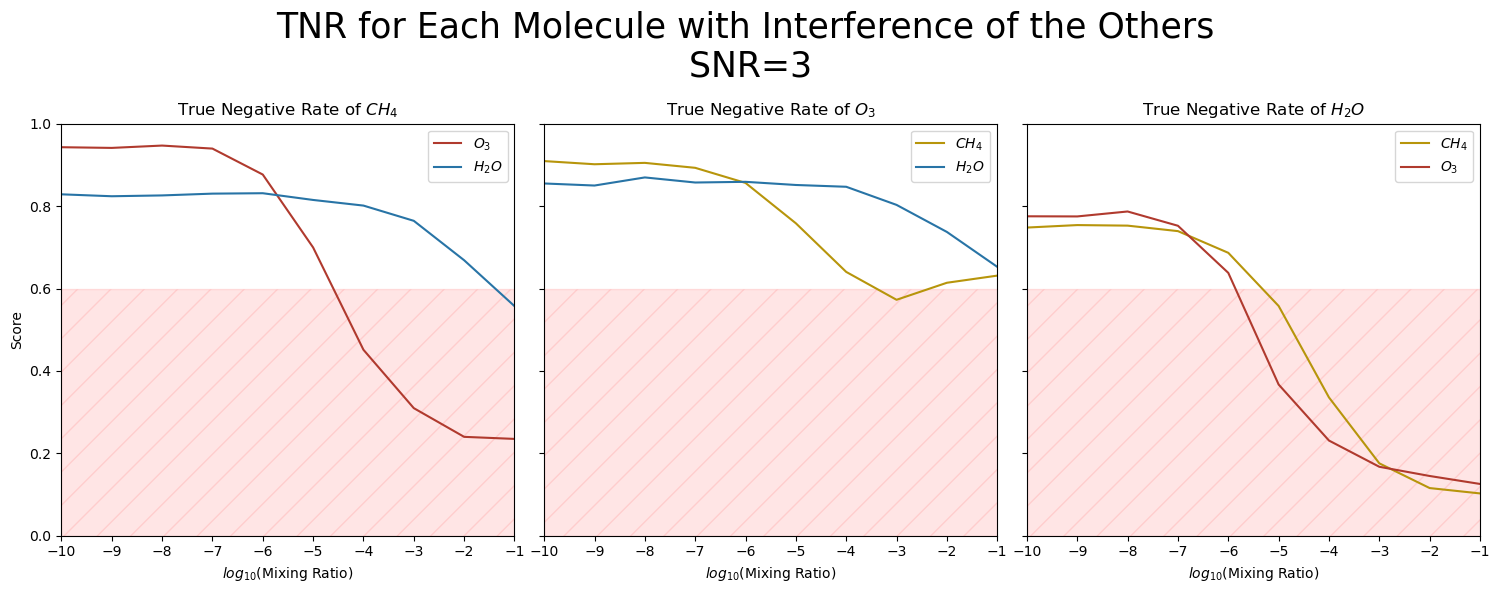

C:\Users\santi\AppData\Local\Temp\ipykernel_16956\3491975728.py:337: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


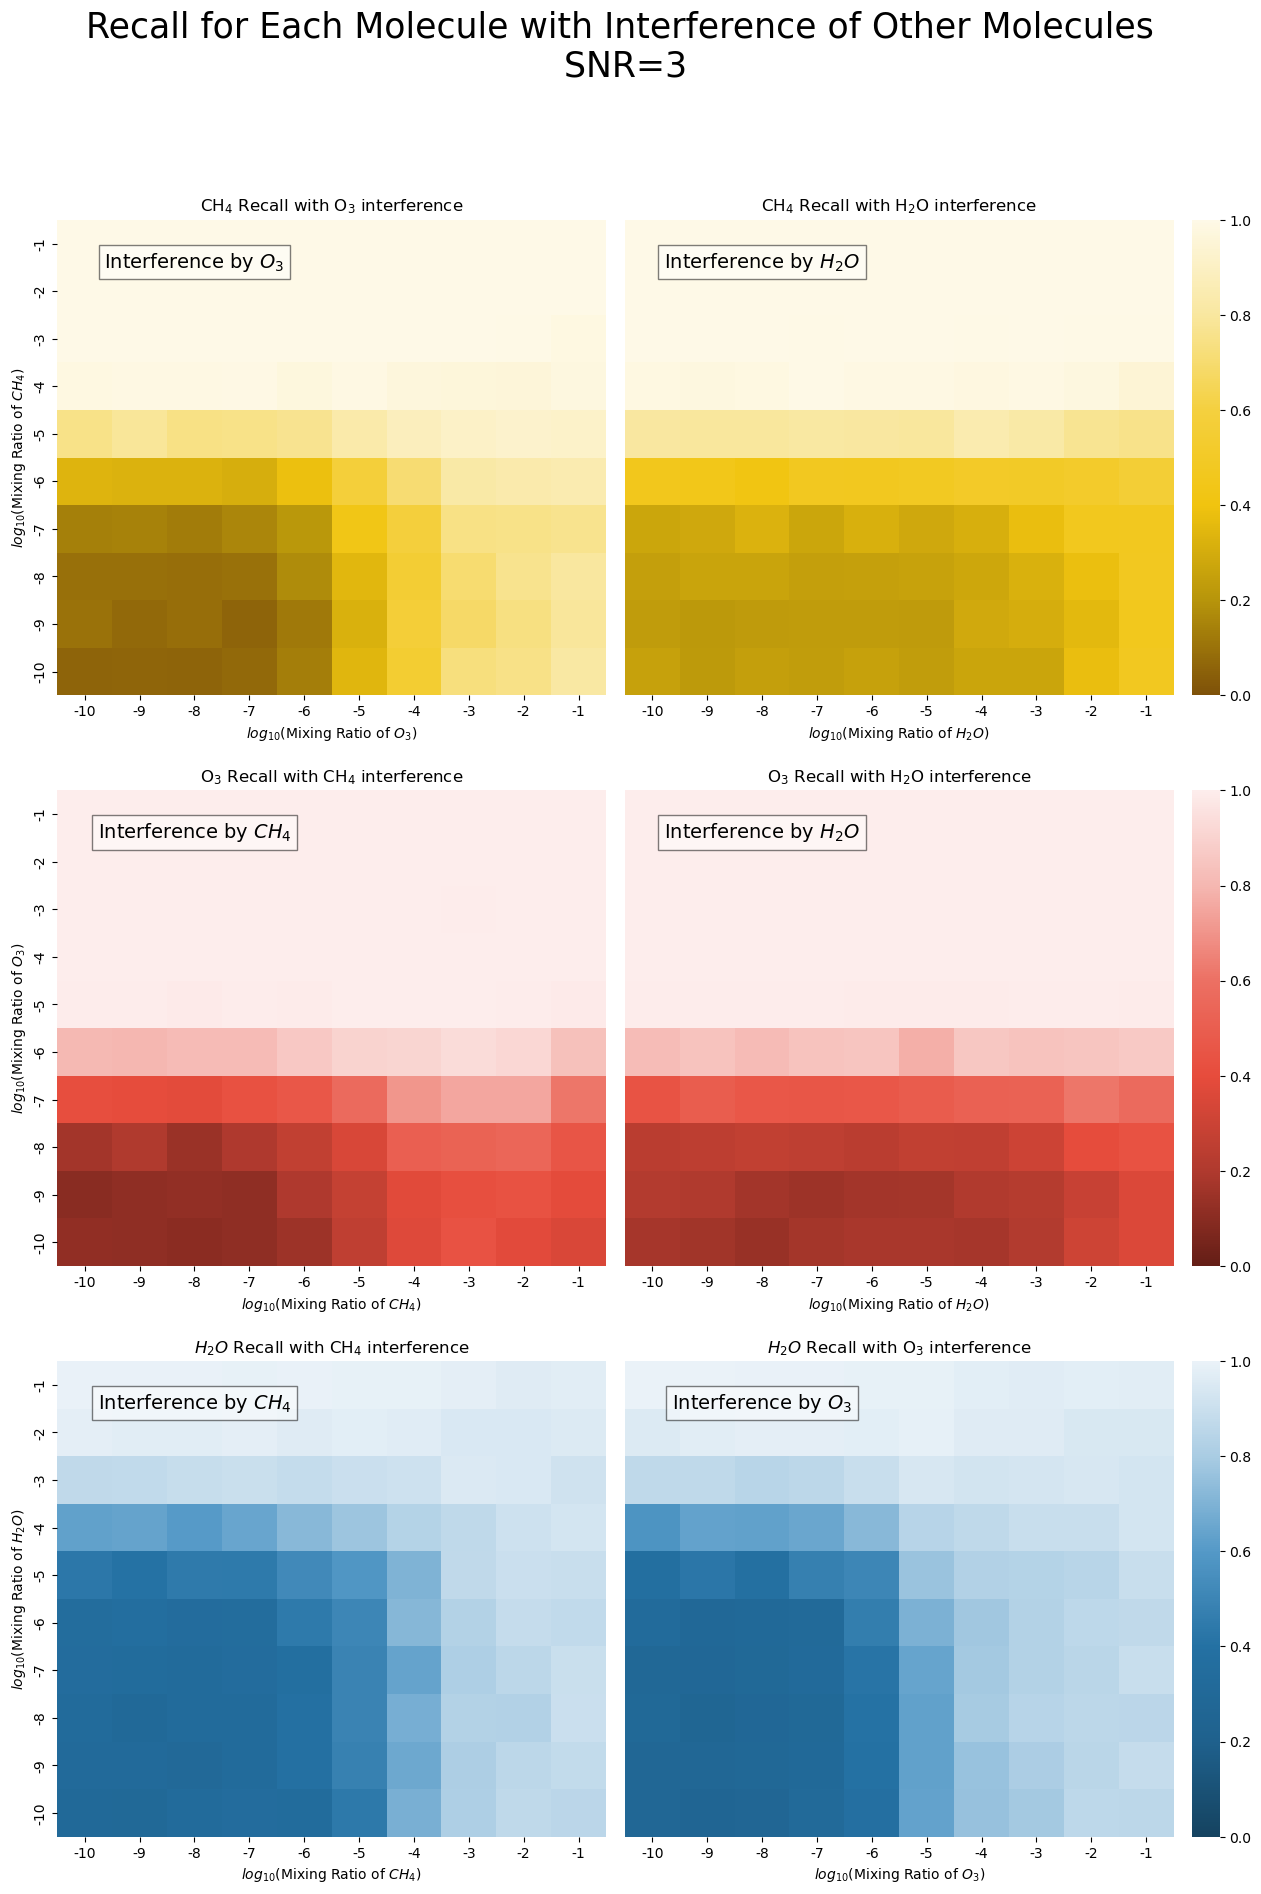

In [18]:
#SNRS = [1,2,3,5,7,10,15,20]
SNRS = [3]



for SNR in SNRS:
    print(f"SNR={SNR}")
    SNR_test_CO2_data = mrex.generate_df_SNR_noise(
        df=CO2_data,
        n_repeat=10_000,
        SNR= SNR    
    )

    SNR_test_CH4_data = mrex.generate_df_SNR_noise(
        df=CH4_data,
        n_repeat=500,
        SNR= SNR    
    )

    SNR_test_O3_data = mrex.generate_df_SNR_noise(
        df=O3_data,
        n_repeat=500,
        SNR= SNR    
    )

    SNR_test_H2O_data = mrex.generate_df_SNR_noise(
        df=H2O_data,
        n_repeat=500,
        SNR= SNR    
    )

    SNR_test_CH4_O3_data = mrex.generate_df_SNR_noise(
        df=CH4_O3_data,
        n_repeat=50,
        SNR=SNR
    )

    SNR_test_CH4_H2O_data = mrex.generate_df_SNR_noise(
        df=CH4_H2O_data,
        n_repeat=50,
        SNR=SNR
    )

    SNR_test_O3_H2O_data = mrex.generate_df_SNR_noise(
        df=O3_H2O_data,
        n_repeat=50,
        SNR=SNR
    )

    SNR_test_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
        df=CH4_O3_H2O_data,
        n_repeat=10,
        SNR=SNR
    )
        
    SNR_test_df = pd.concat(
        [
            SNR_test_CO2_data,
            SNR_test_CH4_data,
            SNR_test_O3_data,
            SNR_test_H2O_data,
            SNR_test_CH4_O3_data,
            SNR_test_CH4_H2O_data,
            SNR_test_O3_H2O_data,
            SNR_test_CH4_O3_H2O_data
        ],
        ignore_index=True
    )
    
    SNR_test_df["label"] = SNR_test_df["label"].apply(string_to_list)
    
    SNR_test_df.iloc[:,-n_points:]=normalize_min_max_by_row(SNR_test_df.iloc[:,-n_points:])
    SNR_X_test = SNR_test_df.iloc[:,-n_points:]
    SNR_test_CH4 = np.array([item[0] for item in SNR_test_df["label"]])
    SNR_test_O3 = np.array([item[1] for item in SNR_test_df["label"]])
    SNR_test_H2O = np.array([item[2] for item in SNR_test_df["label"]])
    
    SNR_test_df["CH4 label"] = SNR_test_CH4
    SNR_test_df["O3 label"] = SNR_test_O3
    SNR_test_df["H2O label"] = SNR_test_H2O
    
    cols = list(SNR_test_df.columns)
    cols = cols[-3:] + cols[:-3]
    SNR_test_df = SNR_test_df[cols]
  
    remove_warnings()
  
    CH4_probabilities= rf.predict_proba(SNR_X_test)[0][:,1]
    O3_probabilities= rf.predict_proba(SNR_X_test)[1][:,1]
    H2O_probabilities= rf.predict_proba(SNR_X_test)[2][:,1]
    
    CH4_threshold = 0.49
    O3_threshold = 0.45
    H2O_threshold = 0.5
    
    CH4_y_pred = (CH4_probabilities > CH4_threshold).astype(int)
    O3_y_pred = (O3_probabilities > O3_threshold).astype(int)
    H2O_y_pred = (H2O_probabilities > H2O_threshold).astype(int)
    
    SNR_test_df["CH4 pred"] = CH4_y_pred
    SNR_test_df["O3 pred"] = O3_y_pred
    SNR_test_df["H2O pred"] = H2O_y_pred    
    
    no_CH4_sO3 = np.zeros(10)
    no_CH4_sH2O = np.zeros(10)
    no_O3_sCH4 = np.zeros(10)
    no_O3_sH2O = np.zeros(10)
    no_H2O_sCH4 = np.zeros(10)
    no_H2O_sO3 = np.zeros(10)
    
    for i, mix in enumerate(range(-10,-0)):
        permix_no_CH4_sO3 = SNR_test_df[
            (SNR_test_df["atm O3"]==mix) &
            (SNR_test_df["atm CH4"]==0)
            ]
        permix_no_CH4_sH2O = SNR_test_df[
            (SNR_test_df["atm H2O"]==mix) &
            (SNR_test_df["atm CH4"]==0)
            ]
        permix_no_O3_sCH4 = SNR_test_df[
            (SNR_test_df["atm CH4"]==mix) &
            (SNR_test_df["atm O3"]==0)
            ]
        permix_no_O3_sH2O = SNR_test_df[
            (SNR_test_df["atm H2O"]==mix) &
            (SNR_test_df["atm O3"]==0)
            ]
        permix_no_H2O_sCH4 = SNR_test_df[
            (SNR_test_df["atm CH4"]==mix) &
            (SNR_test_df["atm H2O"]==0)
            ]
        permix_no_H2O_sO3 = SNR_test_df[
            (SNR_test_df["atm O3"]==mix) &
            (SNR_test_df["atm H2O"]==0)
            ]        
        no_CH4_sO3[i] = accuracy_score(permix_no_CH4_sO3["CH4 label"], 
                                       permix_no_CH4_sO3["CH4 pred"])
        no_CH4_sH2O[i] = accuracy_score(permix_no_CH4_sH2O["CH4 label"],
                                        permix_no_CH4_sH2O["CH4 pred"])
        no_O3_sCH4[i] = accuracy_score(permix_no_O3_sCH4["O3 label"],
                                       permix_no_O3_sCH4["O3 pred"])
        no_O3_sH2O[i] = accuracy_score(permix_no_O3_sH2O["O3 label"], 
                                       permix_no_O3_sH2O["O3 pred"])
        no_H2O_sCH4[i] = accuracy_score(permix_no_H2O_sCH4["H2O label"],
                                        permix_no_H2O_sCH4["H2O pred"])
        no_H2O_sO3[i] = accuracy_score(permix_no_H2O_sO3["H2O label"],
                                       permix_no_H2O_sO3["H2O pred"])
        
    ##  plot accuracy
    fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
    ax[0].plot(range(-10,0), no_CH4_sO3, 
               label="$O_3$", color= "#B03A2E")
    ax[0].plot(range(-10,0), no_CH4_sH2O,
               label="$H_2O$", color= "#2874A6")
    ax[0].set_title("True Negative Rate of $CH_4$")
    ax[0].set_xlabel("$log_{10}$(Mixing Ratio)")
    ax[0].set_ylabel("Score")
    ax[0].fill_between(range(-10,1), 0, 0.6,
                    hatch = "/",
                    color="red",
                    alpha = 0.1)
    ax[0].set_xlim(-10,-1)
    ax[0].set_ylim(0,1)
    ax[0].legend()
    
    ax[1].plot(range(-10,0), no_O3_sCH4,
               label="$CH_4$", color= "#B7950B")
    ax[1].plot(range(-10,0), no_O3_sH2O,
               label="$H_2O$", color= "#2874A6")
    ax[1].set_title("True Negative Rate of $O_3$")
    ax[1].set_xlabel("$log_{10}$(Mixing Ratio)")
    ax[1].fill_between(range(-10,1), 0, 0.6,
                    hatch = "/",
                    color="red",
                    alpha = 0.1)
    ax[1].set_xlim(-10,-1)
    ax[1].set_ylim(0,1)
    ax[1].legend()
    
    ax[2].plot(range(-10,0), no_H2O_sCH4, 
               label="$CH_4$", color= "#B7950B")
    ax[2].plot(range(-10,0), no_H2O_sO3, 
               label="$O_3$", color= "#B03A2E")
    ax[2].set_title("True Negative Rate of $H_2O$")
    ax[2].set_xlabel("$log_{10}$(Mixing Ratio)")
    ax[2].fill_between(range(-10,1), 0, 0.6,
                    hatch = "/",
                    color="red",
                    alpha = 0.1)
    ax[2].set_xlim(-10,-1)
    ax[2].set_ylim(0,1)
    ax[2].legend()
    
    plt.suptitle(f"TNR for Each Molecule with Interference of the Others\n SNR={SNR}", fontsize=25)
    
    plt.tight_layout()
    
    plt.show()  
    
    ###
    si_CH4_sO3 = np.zeros((10,10))
    si_CH4_sH2O = np.zeros((10,10))
    si_O3_sCH4 = np.zeros((10,10))
    si_O3_sH2O = np.zeros((10,10))
    si_H2O_sCH4 = np.zeros((10,10))
    si_H2O_sO3 = np.zeros((10,10))
    
    for i, mix1 in enumerate(range(-10,-0)):
        for j, mix2 in enumerate(range(-10,-0)):
            permix_si_CH4_sO3 = SNR_test_df[
                (SNR_test_df["atm O3"]==mix2) &
                (SNR_test_df["atm CH4"]==mix1)
                ]
            permix_si_CH4_sH2O = SNR_test_df[
                (SNR_test_df["atm H2O"]==mix2) &
                (SNR_test_df["atm CH4"]==mix1)
                ]
            permix_si_O3_sCH4 = SNR_test_df[
                (SNR_test_df["atm CH4"]==mix2) &
                (SNR_test_df["atm O3"]==mix1)
                ]
            permix_si_O3_sH2O = SNR_test_df[
                (SNR_test_df["atm H2O"]==mix2) &
                (SNR_test_df["atm O3"]==mix1)
                ]
            permix_si_H2O_sCH4 = SNR_test_df[
                (SNR_test_df["atm CH4"]==mix2) &
                (SNR_test_df["atm H2O"]==mix1)
                ]
            permix_si_H2O_sO3 = SNR_test_df[
                (SNR_test_df["atm O3"]==mix2) &
                (SNR_test_df["atm H2O"]==mix1)
                ]        
            si_CH4_sO3[i,j] = accuracy_score(permix_si_CH4_sO3["CH4 label"],
                                             permix_si_CH4_sO3["CH4 pred"])
            si_CH4_sH2O[i,j] = accuracy_score(permix_si_CH4_sH2O["CH4 label"],
                                              permix_si_CH4_sH2O["CH4 pred"])
            si_O3_sCH4[i,j] = accuracy_score(permix_si_O3_sCH4["O3 label"],
                                             permix_si_O3_sCH4["O3 pred"])
            si_O3_sH2O[i,j] = accuracy_score(permix_si_O3_sH2O["O3 label"],
                                             permix_si_O3_sH2O["O3 pred"])
            si_H2O_sCH4[i,j] = accuracy_score(permix_si_H2O_sCH4["H2O label"],
                                              permix_si_H2O_sCH4["H2O pred"])            
            si_H2O_sO3[i,j] = accuracy_score(permix_si_H2O_sO3["H2O label"], 
                                             permix_si_H2O_sO3["H2O pred"])
      
    log_ratios =  np.arange(-10, 0, 1)
    color_scales = {
        'CH4': ["#7E5109", "#B7950B", "#F1C40F", "#F4D03F", "#F9E79F", "#FEF9E7"],
        'O3': ["#641E16", "#B03A2E", "#E74C3C", "#EC7063", "#F5B7B1", "#FDEDEC"],
        'H2O': ["#154360", "#1F618D", "#2471A3", "#5499C7", "#A9CCE3", "#EAF2F8"]
        }
    from matplotlib.colors import LinearSegmentedColormap
    color_ch4 = LinearSegmentedColormap.from_list("CH4", color_scales['CH4'], N=256)
    color_o3 = LinearSegmentedColormap.from_list("O3", color_scales['O3'], N=256)
    color_h2o = LinearSegmentedColormap.from_list("H2O", color_scales['H2O'], N=256)

    fig = plt.figure(figsize=(15, 21))
    gs = fig.add_gridspec(3, 3, width_ratios=[1, 1, 0.05], wspace=0.05)

    def add_label(ax, text):
        ax.annotate(text, xy=(0.25, 0.9), xycoords='axes fraction',
                    fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=0.5))

    # Heatmap 1
    ax1 = fig.add_subplot(gs[0, 0],sharey=None)
    sns.heatmap(si_CH4_sO3, ax=ax1, vmin=0, vmax=1,
                xticklabels=log_ratios, yticklabels=log_ratios,
                cmap=color_ch4, cbar=False)
    ax1.set_title("CH$_4$ Recall with O$_3$ interference")
    ax1.set_xlabel("$log_{10}$(Mixing Ratio of $O_3$)")
    ax1.set_ylabel("$log_{10}$(Mixing Ratio of $CH_4$)")
    ax1.invert_yaxis()
    add_label(ax1, 'Interference by $O_3$')

    # Heatmap 2
    ax2 = fig.add_subplot(gs[0, 1],sharey=ax1)
    cbar_ax1 = fig.add_subplot(gs[0, 2])
    sns.heatmap(si_CH4_sH2O, ax=ax2,
                vmin=0, vmax=1,
                xticklabels=log_ratios, yticklabels=log_ratios,
                cmap=color_ch4, cbar_ax=cbar_ax1)
    ax2.set_title("CH$_4$ Recall with H$_2$O interference")
    ax2.set_xlabel("$log_{10}$(Mixing Ratio of $H_2O$)")
    ax2.yaxis.set_visible(False)
    ax2.invert_yaxis()
    add_label(ax2, 'Interference by $H_2O$')

    # Heatmap 3
    ax3 = fig.add_subplot(gs[1, 0],sharey=None)
    sns.heatmap(si_O3_sCH4, ax=ax3, vmin=0, vmax=1,
                xticklabels=log_ratios, yticklabels=log_ratios, 
                cmap=color_o3, cbar=False)
    ax3.set_title("O$_3$ Recall with CH$_4$ interference")
    ax3.set_xlabel("$log_{10}$(Mixing Ratio of $CH_4$)")
    ax3.set_ylabel("$log_{10}$(Mixing Ratio of $O_3$)")
    ax3.invert_yaxis()
    add_label(ax3, 'Interference by $CH_4$')

    # Heatmap 4
    ax4 = fig.add_subplot(gs[1, 1],sharey=ax3)
    cbar_ax2 = fig.add_subplot(gs[1, 2])
    sns.heatmap(si_O3_sH2O, ax=ax4, vmin=0, vmax=1, 
                xticklabels=log_ratios, yticklabels=log_ratios, 
                cmap=color_o3, cbar_ax=cbar_ax2)
    ax4.set_title("O$_3$ Recall with H$_2$O interference")
    ax4.set_xlabel("$log_{10}$(Mixing Ratio of $H_2O$)")
    ax4.set_ylabel("$log_{10}$(Mixing Ratio of $O_3$)")
    ax4.invert_yaxis()
    ax4.yaxis.set_visible(False)
    add_label(ax4, 'Interference by $H_2O$')

    # Heatmap 5
    ax5 = fig.add_subplot(gs[2, 0],sharey=None)
    sns.heatmap(si_H2O_sCH4, ax=ax5, vmin=0, vmax=1, 
                xticklabels=log_ratios, yticklabels=log_ratios, 
                cmap=color_h2o, cbar=False)
    ax5.set_title("$H_2O$ Recall with CH$_4$ interference")
    ax5.set_xlabel("$log_{10}$(Mixing Ratio of $CH_4$)")
    ax5.set_ylabel("$log_{10}$(Mixing Ratio of $H_2O$)")
    ax5.invert_yaxis()
    add_label(ax5, 'Interference by $CH_4$')

    # Heatmap 6
    ax6 = fig.add_subplot(gs[2, 1],sharey=ax5)
    cbar_ax3 = fig.add_subplot(gs[2, 2])
    sns.heatmap(si_H2O_sO3, ax=ax6, vmin=0, vmax=1, 
                xticklabels=log_ratios, yticklabels=log_ratios,
                cmap=color_h2o, cbar_ax=cbar_ax3)
    ax6.set_title("$H_2O$ Recall with O$_3$ interference")
    ax6.set_xlabel("$log_{10}$(Mixing Ratio of $O_3$)")
    ax6.set_ylabel("$log_{10}$(Mixing Ratio of $H_2O$)")
    ax6.invert_yaxis()
    ax6.yaxis.set_visible(False)
    add_label(ax6, 'Interference by $O_3$')
    plt.suptitle(f"Recall for Each Molecule with Interference of Other Molecules\n SNR={SNR}", fontsize=25)
    plt.tight_layout()   

    plt.show()